<a href="https://colab.research.google.com/github/MichelaTasca/FAD_project/blob/main/Progetto_FAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indice
1. [Acquisizione e comprensione del Dataset](#scrollTo=ULs0Q1fGfTJc&line=1&uniqifier=1)  
&nbsp;&nbsp;1.1[Download del Dataset](#scrollTo=irtGy-Yazwii&line=1&uniqifier=1)  
&nbsp;&nbsp;1.2 [Presentazione del dataset](#scrollTo=5OKsi3kJ2Dxl&line=1&uniqifier=1)  
&nbsp;&nbsp;1.3 [Dizionario dei dati](#scrollTo=WbWAQaK2gH9Q&line=1&uniqifier=1)  
&nbsp;&nbsp;1.4 [Domande per l'Analisi dei dati](#scrollTo=AHHOPAJWgAHX&line=1&uniqifier=1)



2. [Pulizia e PreProcessing dei dati](#scrollTo=AfxArJWShatT&line=1&uniqifier=1)  
   &nbsp;&nbsp;2.1 [Gestione dei valori mancanti](#scrollTo=gcDBql8__fQ1&line=1&uniqifier=1)  
   &nbsp;&nbsp;2.2 [Gestione dei duplicati](#scrollTo=0vPXPkpk_wsf&line=2&uniqifier=1)  
   &nbsp;&nbsp;2.3 [Correzione delle inconsistenze](#scrollTo=AbGRhNgmAHVn&line=1&uniqifier=1)  
   &nbsp;&nbsp;2.4 [Gestione degli Outlier](#scrollTo=1_WJbslea0pg&line=1&uniqifier=1)  

3. [Analisi esplorativa](#scrollTo=s-F3d9a4Nzd7&line=1&uniqifier=1)  
   &nbsp;&nbsp;3.1 [Analisi Univariata](#scrollTo=YvyorsqVENSh&line=1&uniqifier=1)  
   &nbsp;&nbsp;3.2 [Analisi Multivariata](#scrollTo=6A-rscB2Mcpn&line=2&uniqifier=1)  
4. [Inferenza Statistica](#scrollTo=xzZyNBwVMkZE&line=2&uniqifier=1)  
   &nbsp;&nbsp;4.1 [Analisi 1: Adozione vs. Specie](#scrollTo=yKXFWFYJMn_8&line=1&uniqifier=1)  
   &nbsp;&nbsp;4.2 [Analisi 2: Adozione vs. Età](#scrollTo=4VtuOdl07bHH&line=1&uniqifier=1)  
   &nbsp;&nbsp;4.3 [Analisi 3: Adozione vs. Periodo](#scrollTo=66mBsEPRMtf_&line=1&uniqifier=1)  
   &nbsp;&nbsp;4.4 [Analisi 4: Adozione vs. Colore](#scrollTo=LpESSRQqMv1k&line=1&uniqifier=1)  
   &nbsp;&nbsp;4.5 [Analisi 5: Outcome vs. Sterilizzazione](#scrollTo=GWbYWOIfMrAD&line=1&uniqifier=1)  
5. [Modellazione e predizione](#scrollTo=ZKuzzqI07n1I&line=1&uniqifier=1)  
   &nbsp;&nbsp;5.1 [Analisi Statistica e Regressione](#scrollTo=Z33_ORwk8P0K&line=1&uniqifier=1)  
   &nbsp;&nbsp;5.2 [Analisi Predittiva e Machine Learning](#scrollTo=MSdvueNUZkMg&line=1&uniqifier=1)


In [139]:
!pip freeze > requirements.txt

#1. Acquisizione e comprensione del Dataset  

##1.1 Download del dataset


In [140]:

import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib import patches
from scipy import stats
import matplotlib.colors as mcolors
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.ticker as ticker

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

path = kagglehub.dataset_download("aaronschlegel/austin-animal-center-shelter-outcomes-and")

print("Path to dataset files:", path)
# 2. Mostra i file disponibili
print("File disponibili:", os.listdir(path))

# 3. Carica il dataset
file_path = os.path.join(path, "aac_shelter_outcomes.csv")
shel= pd.read_csv(file_path)



Using Colab cache for faster access to the 'austin-animal-center-shelter-outcomes-and' dataset.
Path to dataset files: /kaggle/input/austin-animal-center-shelter-outcomes-and
File disponibili: ['aac_shelter_cat_outcome_eng.csv', 'aac_shelter_outcomes.csv']


##1.2 Presentazione del dataset

Di seguito, visualizziamo i nomi degli attributi e i primi 10 elementi, per iniziare a capire e studiare il dataset.

In [141]:
shel.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [142]:
shel.head(10)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,2014-12-13T12:20:00,NaN,Suffering,Euthanasia,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female


## 1.3 Dizionario dei dati

Questo dataset ha l'biettivo di registrare i dati di un rifugio per animali. Gli attributi sono i seguenti:
*   **`animal_id`**: identificativo dell'animale
*   **`animal_type`**: tipologia di animale
*   **`breed`**: razza dell'animale
*   **`color`**: colore/i dell'animale
*   **`date_of_birth`**: data di nascita dell'animale
*   **`datetime`**: data e ora dell'outcome dell'animale dal rifugio
*   **`monthyear`**: data e ora dell'outcome dell'animale dal rifugio
*   **`name`**: nome dell'animale
*   **`outcome_subtype`**: motivo dell'outcome
*   **`outcome_type`**: modalità dell'outcome
*   **`sex_upon_outcome`**: sesso al momento dell'outcome



##1.4 Domande per l'Analisi dei dati

1. Vengono adottati più cani o gatti?
2. L'età dell'animale influenza l'adozione?
3. Da cosa può dipendere il tempo di permanenza (razza/colore)?
4. L'essere sterilizzato influenza l'outcome?
5. L'outcome è time-relevant? (in certi periodi +/- adozioni)


# 2. Pulizia e PreProcessing

##2.1 Gestione valori mancanti

Plottiamo le occorrenze di valori NaN e dei valori Unknown per ogni attributo.

In [143]:
nan_counts = shel.isna().sum()
placeholders_to_check = ['unknown', '', 'n/a', 'na', 'nan', '-', 'null', 'not available', 'no color', 'no breed']
unknown_counts = pd.Series(0, index=shel.columns)

for col in shel.select_dtypes(include=['object']).columns:
    col_data = shel[col].astype(str).str.lower().str.strip()
    unknown_counts[col] = col_data.isin(placeholders_to_check).sum()

missing_data = pd.DataFrame({
    'NaN': nan_counts,
    'Unknows': unknown_counts,
})
missing_data['Total missings'] = missing_data['NaN'] + missing_data['Unknows']
missing_data = missing_data[missing_data['Total missings'] > 0].sort_values(by='Total missings', ascending=False)



cmap = plt.colormaps['viridis']

def row_color_gradient(s):
    #Applica un gradiente di sfondo Viridis basato sulla posizione della riga.

    # Calcola il range di colori basato sull'indice della riga (0 a N-1)
    norm = plt.Normalize(0, len(s) - 1)

    # Mappa la posizione della riga al colore Viridis (RGB)
    rgb_colors = [cmap(norm(i)) for i in range(len(s))]

    # Genera lo stile di sfondo (background-color)
    bg_styles = [f'background-color: {mcolors.rgb2hex(rgb)}' for rgb in rgb_colors]

    return bg_styles

def text_color_contrast(s):
    #Applica il colore del testo (bianco o nero) in base alla luminosità dello sfondo.

    # Calcola il range di colori basato sull'indice della riga (0 a N-1)
    norm = plt.Normalize(0, len(s) - 1)
    rgb_colors = [cmap(norm(i)) for i in range(len(s))]
    text_styles = []
    for rgb in rgb_colors:
        r, g, b, _ = rgb
        luminosity = 0.2126 * r + 0.7152 * g + 0.0722 * b
        text_color = 'black' if luminosity > 0.5 else 'white'
        text_styles.append(f'color: {text_color}')

    return text_styles


# Applica la funzione di sfondo e la funzione di colore del testo
styled_table = missing_data.style.apply(row_color_gradient, axis=0)
styled_table = styled_table.apply(text_color_contrast, axis=0) # Applica il colore del testo


styled_table = styled_table.set_table_styles([
    {'selector': 'th, td',
     'props': [('border-style', 'solid'),
               ('border-width', '1px'),
               ('border-color', 'white')]},
    {'selector': '',
     'props': [('border-collapse', 'collapse')]}
])

styled_table = styled_table.set_properties(**{'font-size': '10pt', 'text-align': 'center'})

display(styled_table)

,NaN,Unknows,Total missings
outcome_subtype,42293,42293,84586
name,23886,23887,47773
sex_upon_outcome,2,6577,6579
outcome_type,12,12,24
age_upon_outcome,8,8,16


Interpretiamo i dati della tabella e procediamo nel seguente modo:

*   **`name`**: creo una feature binaria `name`
*   **`sex_upon_outcome`** e  **`outcome_subtype`** : sostituisco i NaN con *Unknown*
* **`age_upon_outcome`** e **`outcome_subtype`** : essendo poche occorrenze NaN, elimino i dati




In [144]:
# 'name' → crea feature binaria
shel['has_name'] = shel['name'].notna().astype(int)
shel = shel.drop(columns=['name'])

# 'outcome_subtype', 'sex_upon_outcome' → rimpiazza con 'Unknown'
shel['outcome_subtype'] = shel['outcome_subtype'].fillna('Unknown')
shel['sex_upon_outcome'] = shel['sex_upon_outcome'].fillna('Unknown')


#'age_upon_outcome' e 'outcome_type' → rimuovo le righe con NaN
shel = shel.dropna(subset=['outcome_type'])
shel = shel.dropna(subset=['age_upon_outcome'])



Controllo che sia andato tutto a buon fine:

In [145]:
print(shel.info())
shel.head()


<class 'pandas.core.frame.DataFrame'>
Index: 78238 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78238 non-null  object
 1   animal_id         78238 non-null  object
 2   animal_type       78238 non-null  object
 3   breed             78238 non-null  object
 4   color             78238 non-null  object
 5   date_of_birth     78238 non-null  object
 6   datetime          78238 non-null  object
 7   monthyear         78238 non-null  object
 8   outcome_subtype   78238 non-null  object
 9   outcome_type      78238 non-null  object
 10  sex_upon_outcome  78238 non-null  object
 11  has_name          78238 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.8+ MB
None


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,outcome_subtype,outcome_type,sex_upon_outcome,has_name
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,Partner,Transfer,Intact Male,0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Partner,Transfer,Spayed Female,1
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,Unknown,Adoption,Neutered Male,1
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Partner,Transfer,Neutered Male,1
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,Rabies Risk,Euthanasia,Unknown,0


##2.2 Gestione duplicati


Controllo e elimino (se esistono) i duplicati

In [146]:
duplicati = shel.duplicated()
print(f"Dati duplicati:", duplicati.sum())
shel = shel.drop_duplicates()


Dati duplicati: 10


## 2.3 Correzione delle inconsistenze

###2.3.1 Colonne ridondanti
Mi sorge un dubbio: `datetime` e `monthyear` hanno differenze?

In [147]:
(shel['datetime'] == shel['monthyear']).all()

np.True_

Sono identiche: procedo ad eliminare `monthyear` e rinomino `datetime` in `outcome_date`, che è di più semplice comprensione

In [148]:
shel['outcome_date'] = shel['datetime']
shel = shel.drop(columns=['datetime', 'monthyear'])


### 2.3.2 Conversione dell'età
Convertiamo in giorni:

In [149]:
#correzione età
shel['date_of_birth'] = pd.to_datetime(shel['date_of_birth'])
# Use the renamed column 'outcome_date' instead of 'datetime'
shel['outcome_date'] = pd.to_datetime(shel['outcome_date'])

# Calcolo età in giorni e anni
shel['age_at_outcome_days'] = (shel['outcome_date'] - shel['date_of_birth']).dt.days
shel['age_at_outcome_years'] = (shel['age_at_outcome_days'] / 365.25).astype(int)

print(shel[['date_of_birth', 'outcome_date', 'age_at_outcome_days', 'age_at_outcome_years']].head(10))


  date_of_birth        outcome_date  age_at_outcome_days  age_at_outcome_years
0    2014-07-07 2014-07-22 16:04:00                   15                     0
1    2012-11-06 2013-11-07 11:47:00                  366                     1
2    2013-03-31 2014-06-03 14:20:00                  429                     1
3    2005-06-02 2014-06-15 15:50:00                 3300                     9
4    2014-01-07 2014-07-07 14:04:00                  181                     0
5    2013-06-03 2013-10-07 13:06:00                  126                     0
6    2013-12-13 2014-12-13 12:20:00                  365                     0
7    2011-11-23 2014-12-08 15:55:00                 1111                     3
8    2014-06-16 2014-08-14 18:45:00                   59                     0
9    2014-03-26 2014-06-29 17:45:00                   95                     0


###2.3.3 Raggruppamento delle razze
Adesso ci chiediamo: quante tipologie diverse di razze sono presenti?

In [150]:
n_breeds = shel['breed'].nunique()
print("Tipologie di razze diverse:", n_breeds)
print(shel['breed'].head(15))


Tipologie di razze diverse: 2127
0                   Domestic Shorthair Mix
1                               Beagle Mix
2                                 Pit Bull
3                  Miniature Schnauzer Mix
4                                  Bat Mix
5                           Leonberger Mix
6                             Squirrel Mix
7                  Chihuahua Shorthair Mix
8                   Domestic Shorthair Mix
9                   Domestic Shorthair Mix
10                Domestic Medium Hair Mix
11                  Papillon/Border Collie
12          Chihuahua Shorthair/Pomeranian
13    Miniature Schnauzer/Miniature Poodle
14                  Labrador Retriever Mix
Name: breed, dtype: object


Sono tante e troppo precise per lo scopo finale del dataset. Allora ci chiediamo quali siano le 20 razze più frequenti. Decidiamo di visualizzare le frequenze relative, in percentuale, per capire meglio come raggruppare le razze.

In [151]:

fp=shel['breed'].value_counts(normalize=True)*100
fp_formattato = fp.map(lambda x: f'{x:.2f}%')
print(fp_formattato.head(20))

breed
Domestic Shorthair Mix       29.82%
Pit Bull Mix                  7.84%
Chihuahua Shorthair Mix       6.05%
Labrador Retriever Mix        5.89%
Domestic Medium Hair Mix      2.97%
German Shepherd Mix           2.42%
Bat Mix                       1.64%
Domestic Longhair Mix         1.57%
Australian Cattle Dog Mix     1.35%
Siamese Mix                   1.28%
Bat                           1.02%
Dachshund Mix                 1.02%
Boxer Mix                     0.86%
Miniature Poodle Mix          0.83%
Border Collie Mix             0.83%
Catahoula Mix                 0.61%
Raccoon Mix                   0.59%
Rat Terrier Mix               0.58%
Australian Shepherd Mix       0.58%
Yorkshire Terrier Mix         0.56%
Name: proportion, dtype: object


Ci rendiamo conto che alcune razze sono *mix* di altre, o ci sono razze separate da */* : creiamo una nuova feature `main_breed`

In [152]:
# Prend0 solo la razza principale (prima del '/')
shel['main_breed'] = shel['breed'].str.split('/').str[0].str.strip()

# Rimuovo "Mix" in fondo, case-insensitive
shel['main_breed'] = shel['main_breed'].str.replace(r'(?i)\s*Mix$', '', regex=True).str.strip()

# Uniformo le maiuscole per evitare duplicati
shel['main_breed'] = shel['main_breed'].str.title()
n_breeds = shel['main_breed'].nunique()
print(n_breeds)


341


Analizziamo la distribuzione delle frequenze per capire come comportarci nel raggruppamento

In [153]:
fp=shel['main_breed'].value_counts(normalize=True)*100
frequenze_cum = fp.cumsum()
razze_80_percent = (frequenze_cum <= 80).sum()
print(f"Numero di razze che coprono l'80% dei dati: {razze_80_percent}")
razze_rare = fp[fp < 1]
print(f"Numero di razze con frequenza minore dell'1% = {len(razze_rare)}, ovvero il {razze_rare.sum():.2f}% dei dati totali")

Numero di razze che coprono l'80% dei dati: 23
Numero di razze con frequenza minore dell'1% = 327, ovvero il 27.37% dei dati totali


Notiamo che sono 23 le razze che costituiscono l'80% dei dati. Decidiamo quindi di raggruppare i dati per macro aree separate:
- specie
- tipologia
- lunghezza del pelo



In [154]:
def assign_general_macro_area(row):
    """
    Funzione che assegna una macro-area generale basata sulla specie
    """
    animal_type = row['animal_type']
    main_breed = row['main_breed']

    # Gestisci valori nulli
    if pd.isna(main_breed):
        if animal_type == 'Dog':
            return "Dog_Non_Specificato"
        elif animal_type == 'Cat':
            return "Cat_Non_Specificato"
        else:
            return "Altro_Animale"

    main_breed = str(main_breed).lower().strip()


    # CANI (DOGS)

    if animal_type == 'Dog':
        if any(word in main_breed for word in ['pit', 'bull', 'mastiff', 'rottweiler', 'doberman', 'presa', 'corso']):
          return 'Cani da guardia'
        elif any(word in main_breed for word in ['shepherd', 'pastore', 'collie', 'cattle', 'heeler', 'catahoula', 'malinois']):
            return 'Cani pastore'
        elif any(word in main_breed for word in ['retriever', 'labrador', 'golden', 'pointer', 'setter', 'spaniel', 'weimaraner']):
            return 'Retriever'
        elif any(word in main_breed for word in ['hound', 'beagle', 'basset', 'dachshund', 'bassotto', 'segugio', 'foxhound', 'coonhound']):
            return 'Segugi'
        elif any(word in main_breed for word in ['terrier', 'schnauzer']) and 'yorkshire' not in main_breed:
            return 'Terrier'
        elif any(word in main_breed for word in ['chihuahua', 'yorkshire', 'toy', 'miniature', 'pomeranian', 'maltese', 'shih tzu', 'pug', 'papillon']):
            return 'Cani piccola taglia'
        elif any(word in main_breed for word in ['husky', 'malamute', 'akita', 'samoyed', 'spitz', 'chow']):
            return 'Razze nordiche'
        else:
            return 'Mix'


    # GATTI (CATS)

    elif animal_type == 'Cat':
        if "shorthair" in main_breed or "short hair" in main_breed:
            return "Domestic Shorthair"
        elif "medium hair" in main_breed or "mediumhair" in main_breed:
            return "Domestic Mediumhair"
        elif "long hair" in main_breed or "longhair" in main_breed:
            return "Domestic Longhair"
        elif any(word in main_breed for word in ['siamese', 'oriental', 'balinese', 'tonkinese', 'burmese']):
            return 'Razze Orientali'
        else:
            return "Razze Rare"


    # ALTRE SPECIE

    else:
        main_breed_lower = main_breed.lower()

        if 'bat' in main_breed_lower or 'Bat' in main_breed_lower:
            return "Pipistrello"
        elif 'raccoon' in main_breed_lower or 'Raccoon' in main_breed_lower:
            return "Procione"
        elif 'rabbit' in main_breed_lower or 'Rabbit' in main_breed_lower:
            return "Coniglio"
        elif 'opossum' in main_breed_lower:
            return "Opossum"
        elif 'squirrel' in main_breed_lower or 'Squirrel' in main_breed_lower:
            return "Scoiattolo"
        elif 'bird' in main_breed_lower or 'Bird' in main_breed_lower:
            return "Uccello"
        elif 'skunk' in main_breed_lower or 'Skunk' in main_breed_lower:
            return "Puzzola"
        elif 'rat' in main_breed_lower or 'Rat' in main_breed_lower:
            return "Topo"
        elif 'Guinea pig' in main_breed_lower or 'guinea pig' in main_breed_lower:
            return "Porcellino d'India"
        else:
            return "Animali esotici"

shel['macro_area_generale'] = shel.apply(assign_general_macro_area, axis=1)


print("DISTRIBUZIONE MACRO-AREA GENERALE")


generale_counts = shel['macro_area_generale'].value_counts()
generale_pct = (generale_counts / len(shel) * 100).round(2)

print(f"\nTotale animali: {len(shel):,}")
print(f"Numero di macro-aree: {shel['macro_area_generale'].nunique()}")

print("\nDistribuzione completa:")

for categoria, count in generale_counts.items():
    pct = generale_pct[categoria]
    bar = '█' * int(pct / 2)
    print(f"{categoria:<35} {bar:<25} {pct:>6.2f}% ({count:>6,})")

DISTRIBUZIONE MACRO-AREA GENERALE

Totale animali: 78,228
Numero di macro-aree: 23

Distribuzione completa:
Domestic Shorthair                  ███████████████            30.62% (23,957)
Cani piccola taglia                 █████                      11.53% ( 9,022)
Cani da guardia                     █████                      10.88% ( 8,515)
Retriever                           ████                        9.30% ( 7,277)
Cani pastore                        ████                        8.78% ( 6,867)
Mix                                 ███                         6.42% ( 5,019)
Terrier                             ██                          4.48% ( 3,503)
Segugi                              █                           3.86% ( 3,019)
Domestic Mediumhair                 █                           3.14% ( 2,460)
Pipistrello                         █                           2.66% ( 2,080)
Domestic Longhair                                               1.64% ( 1,283)
Razze Orientali        

Adesso ci concentriamo solo sulle specie 'Others', ovvero tutte le specie che non rientrano nella categoria `dog` o `cat`

In [155]:

print("FOCUS: ALTRE SPECIE (non cani/gatti)")


altre_specie = shel[~shel['animal_type'].isin(['Dog', 'Cat'])]
print(f"\nTotale altri animali: {len(altre_specie):,} ({len(altre_specie)/len(shel)*100:.2f}% del dataset)")

if len(altre_specie) > 0:
    print("\nDistribuzione:")
    altre_counts = altre_specie['macro_area_generale'].value_counts()
    for cat, count in altre_counts.items():
        pct = (count / len(altre_specie)) * 100
        print(f"  {cat:<25} {count:>6,} ({pct:>5.2f}%)")

FOCUS: ALTRE SPECIE (non cani/gatti)

Totale altri animali: 4,584 (5.86% del dataset)

Distribuzione:
  Pipistrello                2,080 (45.38%)
  Animali esotici              752 (16.40%)
  Procione                     695 (15.16%)
  Coniglio                     337 ( 7.35%)
  Opossum                      278 ( 6.06%)
  Porcellino d'India           150 ( 3.27%)
  Puzzola                      120 ( 2.62%)
  Scoiattolo                   106 ( 2.31%)
  Topo                          56 ( 1.22%)
  Uccello                       10 ( 0.22%)


###2.3.4 Gestione del colore dell'animale


In [156]:
def consolidate_color(color):
    """Raggruppa i colori in 10 categorie dominanti"""

    if pd.isna(color) or not isinstance(color, str):
        return 'Unknown'

    color_lower = color.lower().replace(' ', '')

    # 1. Solid Colors
    if 'black' in color_lower:
        return 'Black'
    if 'brown' in color_lower or 'chocolate' in color_lower:
        return 'Brown/Chocolate'
    if 'white' in color_lower or 'cream' in color_lower or 'buff' in color_lower:
        return 'White/Cream'
    if 'blue' in color_lower or 'gray' in color_lower:
        return 'Blue/Gray'
    if 'tan' in color_lower or 'yellow' in color_lower:
        return 'Tan/Yellow'
    if 'red' in color_lower or 'orange' in color_lower:
        return 'Red/Orange'

    # 2. Recognizable Patterns
    if 'tabby' in color_lower:
        return 'Tabby'
    if 'tortie' in color_lower or 'torbie' in color_lower:
        return 'Tortie/Torbie'
    if 'calico' in color_lower or 'tricolor' in color_lower:
        return 'Calico/Tricolor'
    if 'point' in color_lower or 'seal' in color_lower or 'lynx' in color_lower:
        return 'Point'

    # 3. Resto
    return 'Other'

    # Applicazione della funzione per creare la nuova colonna categorica
shel['main_color'] = shel['color'].apply(consolidate_color)

print("Distribuzione delle nuove categorie di colore:")
print(shel['main_color'].value_counts())

Distribuzione delle nuove categorie di colore:
main_color
Black              24613
Brown/Chocolate    19296
White/Cream        16572
Blue/Gray           3806
Red/Orange          3440
Calico/Tricolor     3382
Tan/Yellow          2796
Tortie/Torbie       2266
Point               1053
Other                940
Tabby                 64
Name: count, dtype: int64


In [157]:
shel.head(10)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,has_name,outcome_date,age_at_outcome_days,age_at_outcome_years,main_breed,macro_area_generale,main_color
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,Partner,Transfer,Intact Male,0,2014-07-22 16:04:00,15,0,Domestic Shorthair,Domestic Shorthair,Red/Orange
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,Partner,Transfer,Spayed Female,1,2013-11-07 11:47:00,366,1,Beagle,Segugi,Brown/Chocolate
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,Unknown,Adoption,Neutered Male,1,2014-06-03 14:20:00,429,1,Pit Bull,Cani da guardia,White/Cream
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,Partner,Transfer,Neutered Male,1,2014-06-15 15:50:00,3300,9,Miniature Schnauzer,Terrier,White/Cream
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,Rabies Risk,Euthanasia,Unknown,0,2014-07-07 14:04:00,181,0,Bat,Pipistrello,Brown/Chocolate
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,Partner,Transfer,Intact Male,1,2013-10-07 13:06:00,126,0,Leonberger,Mix,Brown/Chocolate
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13,Suffering,Euthanasia,Unknown,0,2014-12-13 12:20:00,365,0,Squirrel,Scoiattolo,Tan/Yellow
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,Partner,Transfer,Spayed Female,1,2014-12-08 15:55:00,1111,3,Chihuahua Shorthair,Cani piccola taglia,Brown/Chocolate
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16,Unknown,Adoption,Intact Female,1,2014-08-14 18:45:00,59,0,Domestic Shorthair,Domestic Shorthair,White/Cream
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26,Offsite,Adoption,Spayed Female,1,2014-06-29 17:45:00,95,0,Domestic Shorthair,Domestic Shorthair,Black


### 2.3.5 Controlli finali

Eliminiamo le colonne che, a seguito del nostro lavoro, risultano essere ridondanti, ovvero:
* `age_upon_outcome`
* `breed`
* `color`  
In seguito visualizziamo la testa del dataset per riepilogo

In [158]:
shel.drop(columns=['age_upon_outcome'], inplace=True)
shel.drop(columns=['breed'], inplace=True)
shel.drop(columns=['color'], inplace=True)
shel.head(10)

,animal_id,animal_type,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,has_name,outcome_date,age_at_outcome_days,age_at_outcome_years,main_breed,macro_area_generale,main_color
0,A684346,Cat,2014-07-07,Partner,Transfer,Intact Male,0,2014-07-22 16:04:00,15,0,Domestic Shorthair,Domestic Shorthair,Red/Orange
1,A666430,Dog,2012-11-06,Partner,Transfer,Spayed Female,1,2013-11-07 11:47:00,366,1,Beagle,Segugi,Brown/Chocolate
2,A675708,Dog,2013-03-31,Unknown,Adoption,Neutered Male,1,2014-06-03 14:20:00,429,1,Pit Bull,Cani da guardia,White/Cream
3,A680386,Dog,2005-06-02,Partner,Transfer,Neutered Male,1,2014-06-15 15:50:00,3300,9,Miniature Schnauzer,Terrier,White/Cream
4,A683115,Other,2014-01-07,Rabies Risk,Euthanasia,Unknown,0,2014-07-07 14:04:00,181,0,Bat,Pipistrello,Brown/Chocolate
5,A664462,Dog,2013-06-03,Partner,Transfer,Intact Male,1,2013-10-07 13:06:00,126,0,Leonberger,Mix,Brown/Chocolate
6,A693700,Other,2013-12-13,Suffering,Euthanasia,Unknown,0,2014-12-13 12:20:00,365,0,Squirrel,Scoiattolo,Tan/Yellow
7,A692618,Dog,2011-11-23,Partner,Transfer,Spayed Female,1,2014-12-08 15:55:00,1111,3,Chihuahua Shorthair,Cani piccola taglia,Brown/Chocolate
8,A685067,Cat,2014-06-16,Unknown,Adoption,Intact Female,1,2014-08-14 18:45:00,59,0,Domestic Shorthair,Domestic Shorthair,White/Cream
9,A678580,Cat,2014-03-26,Offsite,Adoption,Spayed Female,1,2014-06-29 17:45:00,95,0,Domestic Shorthair,Domestic Shorthair,Black


##2.4 Gestione degli Outlier


In [159]:
shel[shel['age_at_outcome_days'] < 0][['date_of_birth','outcome_date','age_at_outcome_days']]

,date_of_birth,outcome_date,age_at_outcome_days
19814,2014-04-03,2013-12-01 13:19:00,-123
22804,2014-12-12,2014-09-10 17:29:00,-93
45764,2016-11-15,2016-11-05 18:16:00,-10
46565,2017-07-01,2017-05-12 16:43:00,-50
47054,2015-05-29,2015-05-26 16:58:00,-3
50533,2015-07-06,2015-07-05 14:46:00,-1
52977,2016-10-28,2016-10-04 15:13:00,-24
64745,2015-08-29,2015-05-24 17:01:00,-97


Notiamo dei valori di età negativa. Eliminiamo allora i dati errati (outliers). Non sono emersi altri valori estremi o incoerenti rispetto al contesto del dataset.

In [160]:
shel.drop(shel[shel['age_at_outcome_days'] < 0].index, axis=0, inplace=True)
shel[shel['age_at_outcome_days'] < 0][['date_of_birth','outcome_date','age_at_outcome_days']]

,date_of_birth,outcome_date,age_at_outcome_days


#3. Analisi esplorativa

##3.1 Analisi univariata

###3.1.1 Variabili numeriche

Iniziamo con le variabili numeriche, come `age_at_outcome_years`:

In [161]:
shel['age_at_outcome_years'].describe()

,age_at_outcome_years
count,78220.000000
mean,1.988328
std,2.954104
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,25.000000


Creiamo le tabelle di frequenza assoluta e relativa di age_at_outcome_years:

In [162]:
colonna = 'age_at_outcome_years'
max_age = shel[colonna].max()
bin_edges_integers = [0.0, 1.0, 5.0, 10.0, 15.0, max_age + 1]
shel['age_group_integer'] = pd.cut(
    shel[colonna],
    bins=bin_edges_integers,
    include_lowest=True,
    right=False
)
#FREQUENZA ASSOLUTA
shel['age'] = pd.cut(
    shel[colonna],
    bins=bin_edges_integers,
    include_lowest=True,
    right=False
)
freq_abs = shel['age'].value_counts().sort_index()
print("\n--- Frequenza Assoluta per Intervalli di Età ---")
print(freq_abs)

#FREQUENZA RELATIVA
totale_osservazioni = freq_abs.sum()
freq_rel = (freq_abs / totale_osservazioni) * 100
freq_rel_formatted = freq_rel.round(2).astype(str) + '%'

print("\n--- Frequenza Relativa per Intervalli di Età ---")
print(freq_rel_formatted)


--- Frequenza Assoluta per Intervalli di Età ---
age
[0.0, 1.0)      34031
[1.0, 5.0)      32745
[5.0, 10.0)      8300
[10.0, 15.0)     2737
[15.0, 26.0)      407
Name: count, dtype: int64

--- Frequenza Relativa per Intervalli di Età ---
age
[0.0, 1.0)      43.51%
[1.0, 5.0)      41.86%
[5.0, 10.0)     10.61%
[10.0, 15.0)      3.5%
[15.0, 26.0)     0.52%
Name: count, dtype: object


Visualizziamole graficamente:

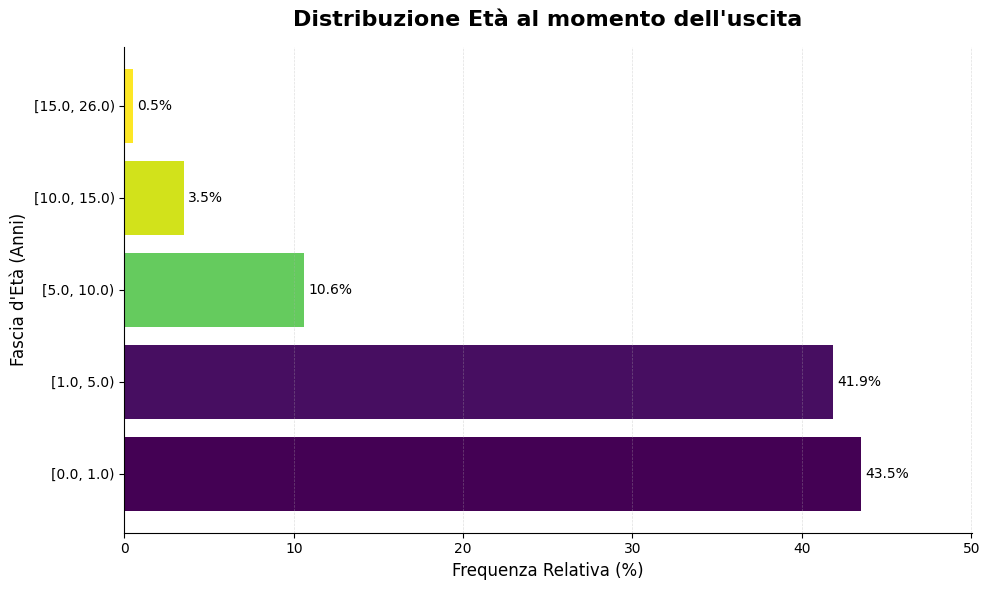

In [163]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

cmap = plt.colormaps['viridis'].reversed()

# Normalizzazione standard (vmin < vmax) sui valori percentuali
norm = mcolors.Normalize(vmin=freq_rel.min(), vmax=freq_rel.max())

# Genera un colore per ogni barra basato sulla sua percentuale
colors = [cmap(norm(p)) for p in freq_rel]


#Barre Orizzontali (Frequenza Relativa %) ---
barre = ax.barh(
    y=freq_rel.index.astype(str),
    width=freq_rel,
    color=colors
)

# Formattazione Etichette (%)
def formatta_percentuale(p):
    """Accetta un valore percentuale e lo formatta in percentuale, mostrando >= 0.5%."""
    if p < 0.5:
        return ""
    return f"{p:.1f}%"

etichette = []
for intervallo in freq_rel.index:
    # Estrae il limite inferiore e il limite superiore dell'intervallo
    inferiore = int(intervallo.left)
    superiore = int(intervallo.right)

    if inferiore == 0 and superiore == 1:
        etichetta = "Meno di 1 anno"
    elif inferiore == superiore - 1:
        etichetta = f"{inferiore} - {superiore} anno"
    elif superiore > 15:
         etichetta = f"Oltre {inferiore} anni"
    else:
        etichetta = f"{inferiore}-{superiore} anni"

    etichette.append(etichetta)

perc = freq_rel.apply(formatta_percentuale).tolist()

ax.bar_label(
    barre,
    labels=perc,
    label_type='edge',
    padding=3,
    color='black',
    fontsize=10,
    fontweight='normal'
)

#  Titolo e Etichette Asse ---
ax.set_title("Distribuzione Età al momento dell'uscita", fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel("Fascia d'Età (Anni)", fontsize=12)
ax.set_xlabel("Frequenza Relativa (%)", fontsize=12)

#  Estetica e Limiti
ax.set_xlim(right=freq_rel.max() * 1.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()

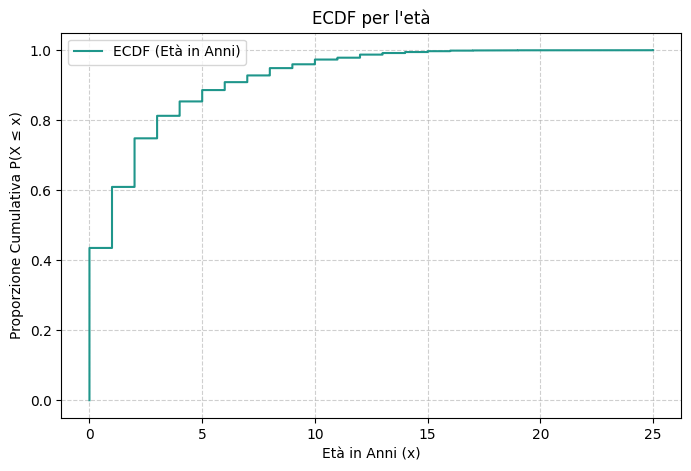

In [164]:
ecdf = ECDF(shel['age_at_outcome_years'])

# Plottaggio dell'ECDF
plt.figure(figsize=(8, 5))

# Plot della funzione
plt.plot(ecdf.x, ecdf.y,
         label='ECDF (Età in Anni)',
         color='#1F968B',
         linestyle='-',
         drawstyle='steps-post')

# Etichette e Titolo
plt.title(f"ECDF per l'età")
plt.xlabel("Età in Anni (x)")
plt.ylabel("Proporzione Cumulativa P(X ≤ x)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Studiando il grafico dell'ECDF, possiamo osservare come circa il 96% degli animali abbia un'età di circa 7.5 anni

Di seguito calcoliamo e visualizziamo i principali indici statistici.


In [165]:
colonna = 'age_at_outcome_years'
eta_dati = shel[colonna]

# 1. Tendenza Centrale
media = np.mean(eta_dati)
mediana = np.median(eta_dati)
# La moda può restituire più valori; prendiamo il primo per il riassunto
moda = eta_dati.mode()

# 2. Dispersione e Variabilità
dev_standard = np.std(eta_dati)
varianza = np.var(eta_dati)
min_val = np.min(eta_dati)
max_val = np.max(eta_dati)
range_val = max_val - min_val
q1 = np.percentile(eta_dati, 25)
q3 = np.percentile(eta_dati, 75)
iqr = q3 - q1

# Stampa i risultati
print("--- Indici Statistici dell'Età in Anni ---")
print(f"Media (Tendenza Centrale): {media:.3f} anni")
print(f"Mediana (Tendenza Centrale): {mediana:.3f} anni")
print(f"Moda (Tendenza Centrale): {moda.iloc[0]:.3f} anni ")
print("-" * 35)
print(f"Deviazione Standard (Dispersione): {dev_standard:.3f}")
print(f"Varianza (Dispersione): {varianza:.3f}")
print(f"Range (Max - Min): {range_val:.3f}")
print(f"Range Interquartile (IQR): {iqr:.3f}")
print(f"Q1 (25° Percentile): {q1:.3f} anni")
print(f"Q3 (75° Percentile): {q3:.3f} anni")

--- Indici Statistici dell'Età in Anni ---
Media (Tendenza Centrale): 1.988 anni
Mediana (Tendenza Centrale): 1.000 anni
Moda (Tendenza Centrale): 0.000 anni 
-----------------------------------
Deviazione Standard (Dispersione): 2.954
Varianza (Dispersione): 8.727
Range (Max - Min): 25.000
Range Interquartile (IQR): 3.000
Q1 (25° Percentile): 0.000 anni
Q3 (75° Percentile): 3.000 anni


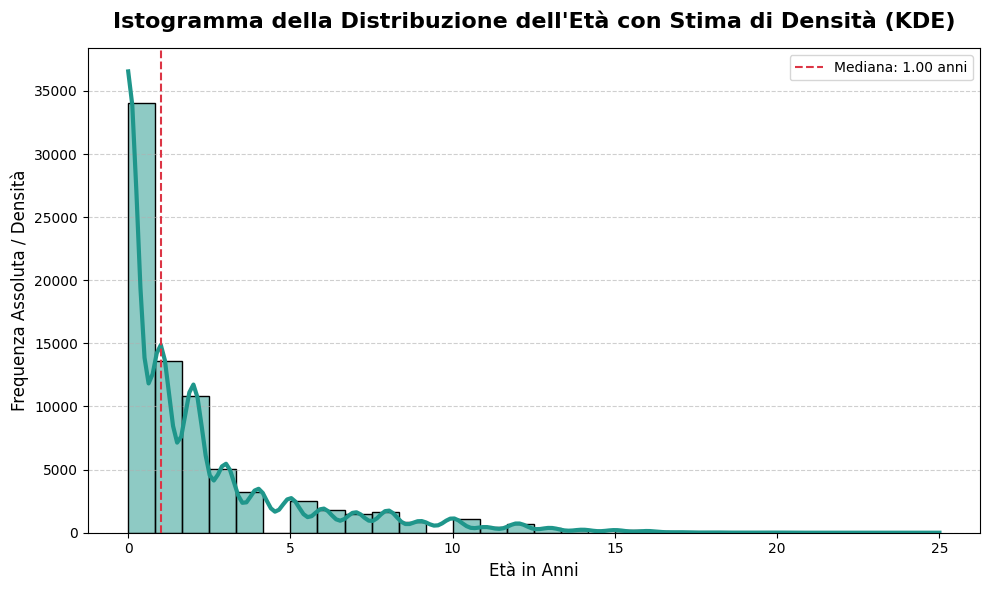

In [166]:
colonna = 'age_at_outcome_years'
eta_dati = shel[colonna]
mediana = np.median(eta_dati)

plt.figure(figsize=(10, 6))

sns.histplot(
    data=shel,
    x=colonna,
    bins=30,
    kde=True,
    color='#1F968B',
    line_kws={'linewidth': 3}
)

ax = plt.gca()



# Definisce la posizione esatta dei tick (0, 5, 10, 15, ...)
max_age = int(np.ceil(eta_dati.max() / 5)) * 5
tick_locations = np.arange(0, max_age + 1, 5)

plt.xticks(tick_locations)

# Forza la formattazione a interi puliti senza spaziatura float
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:d}'))


plt.axvline(mediana, color='#DC3545', linestyle='--', linewidth=1.5, label=f'Mediana: {mediana:.2f} anni')
plt.title("Istogramma della Distribuzione dell'Età con Stima di Densità (KDE)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Età in Anni", fontsize=12)
plt.ylabel("Frequenza Assoluta / Densità", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###3.1.2 Variabili categoriche

Di seguito la visualizzazione delle distribuzioni delle varie variabili categoriche.

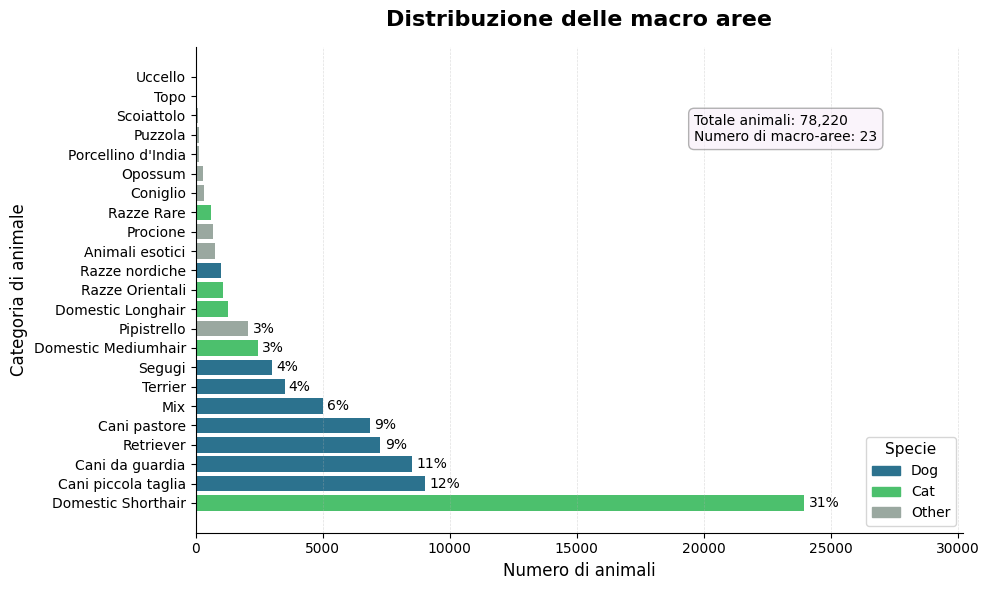

In [167]:

#conteggi e ordin
conteggi = shel['macro_area_generale'].value_counts()
totale = conteggi.sum()
ordine = conteggi.index

plt.figure(figsize=(10, 6))
ax = plt.gca()

#  palette per specie
species_palette = {
    'Dog': '#2C728E',     # viridis scuro
    'Cat': '#4CC06D',     # viridis medio
    'Other': '#9AA8A0'    # grigio verdastro armonizzato
}


#mappa macro_area -> specie (usiamo la moda dei tipi presenti in ogni macro-area)
macro_to_type = (
    shel
    .groupby('macro_area_generale')['animal_type']
    .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else 'Other')
    .to_dict()
)

colors = [
    species_palette.get(macro_to_type.get(macro, 'Other'), species_palette['Other'])
    for macro in ordine
]


legend_patches = [
    patches.Patch(color=color, label=specie)
    for specie, color in species_palette.items()
]
ax.legend(handles=legend_patches, title='Specie', fontsize=10, title_fontsize=11, loc='lower right')


barre = ax.barh(
    y=ordine,
    width=conteggi,
    color=colors
)

# Mostra etichette solo se >= 2%
def formatta_percentuale(c, totale):
    percentuale = (c / totale) * 100
    if percentuale < 2:
        return ""   # niente etichetta
    return f"{percentuale:.0f}%"

etichette = [formatta_percentuale(c, totale) for c in conteggi]

ax.bar_label(
    barre,
    labels=etichette,
    label_type='edge',
    padding=3,
    color='black',
    fontsize=10,
    fontweight='normal'
)

ax.set_title("Distribuzione delle macro aree", fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel("Categoria di animale", fontsize=12)
ax.set_xlabel("Numero di animali", fontsize=12)

ax.set_xlim(right=ax.get_xlim()[1] * 1.20)

stat_text = (
    f"Totale animali: {len(shel):,}\n"
    f"Numero di macro-aree: {shel['macro_area_generale'].nunique()}"
)

ax.text(
    0.65, 0.80,
    stat_text,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(
        boxstyle='round,pad=0.4',
        facecolor="#F7EEF9",
        alpha=0.6,
        edgecolor='gray'
    )
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()
plt.show()


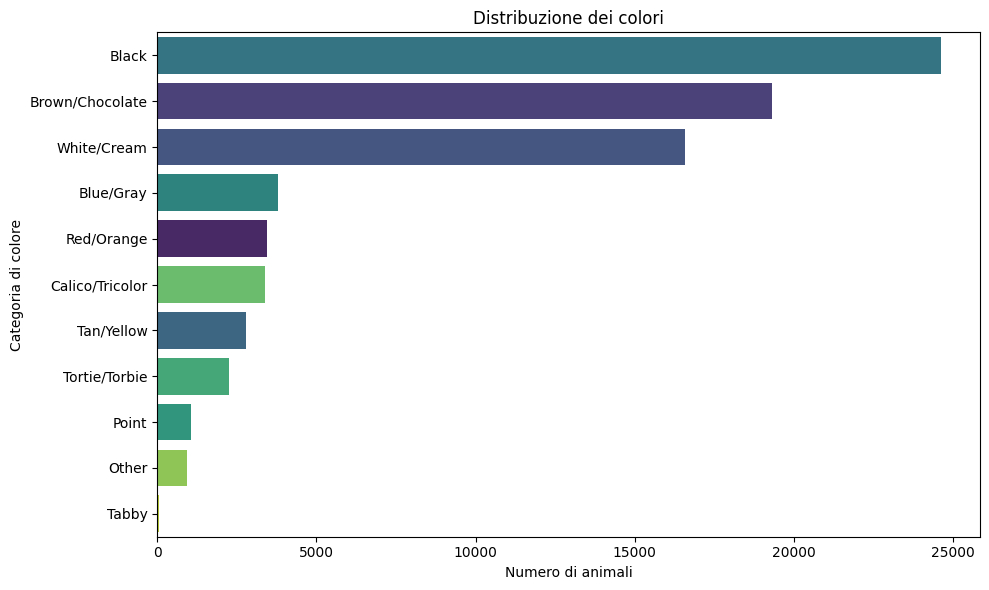

In [168]:
plt.figure(figsize=(10, 6))
sns.countplot(y='main_color', data=shel, hue='main_color', legend=False, palette='viridis',
              order=shel['main_color'].value_counts().index)
plt.title("Distribuzione dei colori")
plt.xlabel("Numero di animali")
plt.ylabel("Categoria di colore")
plt.tight_layout()
plt.show()


##3.2 Analisi multivariata


###3.2.1 Adozione vs. Età

/tmp/ipython-input-2402993803.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


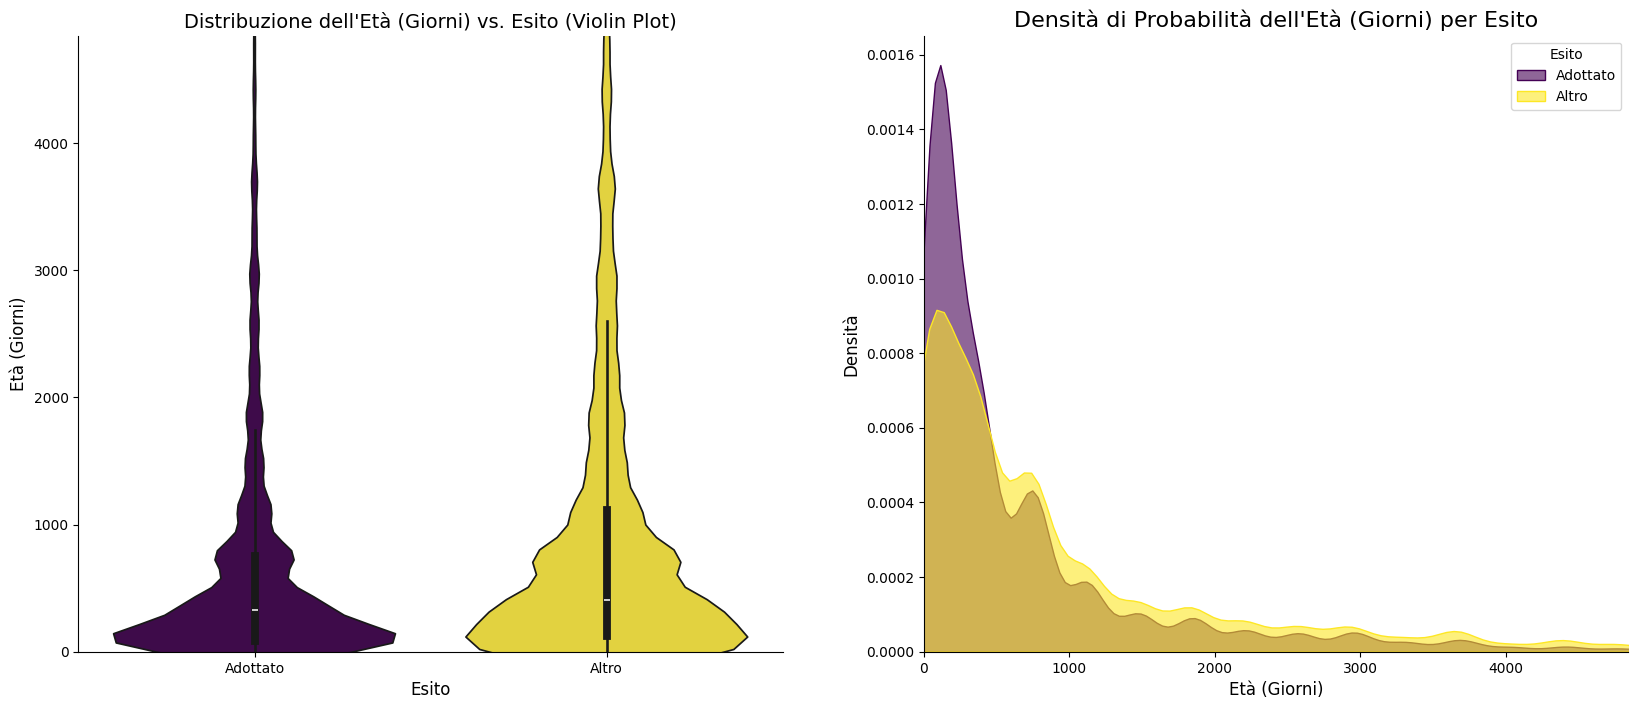

<Figure size 640x480 with 0 Axes>


### Statistiche Descrittive Età (Giorni) per Esito ###
                count    mean      std  min    25%    50%     75%     max
outcome_type                                                             
Adottato      33105.0  651.28   898.29  3.0   87.0  330.0   752.0  6733.0
Altro         45115.0  938.91  1176.70  0.0  124.0  410.0  1115.0  9137.0


In [169]:
is_adopted_filter = shel['outcome_type'] == 'Adoption'

# Crea la variabile x (categorica) basata sul filtro
shel['Plot_Group'] = shel['outcome_type'].apply(lambda x: 'Adottato' if x == 'Adoption' else 'Altro')


plt.figure(figsize=(20, 8))

#Violin Plot
plt.subplot(1, 2, 1)
sns.violinplot(
    x='Plot_Group',
    y='age_at_outcome_days',
    data=shel,
    order=['Adottato', 'Altro'],
    palette={'Adottato': '#440154', 'Altro': '#fde725'}
)
plt.title('Distribuzione dell\'Età (Giorni) vs. Esito (Violin Plot)', fontsize=14)
plt.xlabel('Esito', fontsize=12)
plt.ylabel('Età (Giorni)', fontsize=12)
# Limita l'asse Y per rimuovere gli outlier estremi e migliorare la leggibilità
plt.ylim(0, shel['age_at_outcome_days'].quantile(0.99))


# Box Plot
plt.subplot(1, 2, 2)
sns.kdeplot(
    data=shel,
    x='age_at_outcome_days',
    hue='Plot_Group',
    fill=True,
    common_norm=False, # Normalizza la densità separatamente per Adottato e Altro
    alpha=0.6,
    palette={'Adottato': '#440154', 'Altro': '#fde725'}
)

plt.title('Densità di Probabilità dell\'Età (Giorni) per Esito', fontsize=16)
plt.xlabel('Età (Giorni)', fontsize=12)
plt.ylabel('Densità', fontsize=12)

# Limita l'asse X per una migliore visualizzazione
age_limit = shel['age_at_outcome_days'].quantile(0.99)
plt.xlim(0, age_limit)

plt.legend(title='Esito', labels=['Adottato', 'Altro'])
sns.despine()
plt.show()


plt.tight_layout()
plt.show()


# Rimuovi la colonna temporanea creata per la visualizzazione
del shel['Plot_Group']

print("\n### Statistiche Descrittive Età (Giorni) per Esito ###")
print(shel.groupby(shel['outcome_type'].apply(lambda x: 'Adottato' if x == 'Adoption' else 'Altro'))['age_at_outcome_days'].describe().round(2))

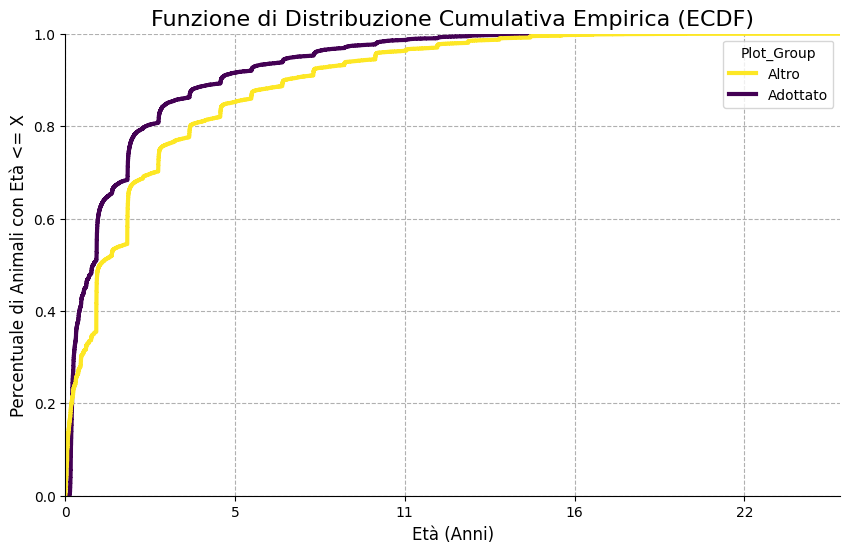

In [170]:
from matplotlib.ticker import FuncFormatter
# Preparazione
shel = shel.dropna(subset=['age_at_outcome_days']).copy()
shel['Plot_Group'] = shel['outcome_type'].apply(lambda x: 'Adottato' if x == 'Adoption' else 'Altro')

def days_to_years_formatter(x, pos):
    """Converte un valore in giorni in un valore in anni per l'etichetta dell'asse."""
    # Uso 365.25 per tenere conto degli anni bisestili
    return f'{x / 365.25:.0f}'

plt.figure(figsize=(10, 6))

sns.ecdfplot(
    data=shel,
    x='age_at_outcome_days', # PLOTTA I DATI IN GIORNI (alta risoluzione)
    hue='Plot_Group',
    palette={'Adottato': '#440154', 'Altro': '#fde725'},
    linewidth=3
)

plt.title('Funzione di Distribuzione Cumulativa Empirica (ECDF)', fontsize=16)

#Applica la funzione di formattazione all'asse X
plt.gca().xaxis.set_major_formatter(FuncFormatter(days_to_years_formatter))

# Imposta il limite visivo in GIORNI (25 anni * 365.25)
LIMIT_DAYS = 25 * 365.25
plt.xlim(0, LIMIT_DAYS)

plt.xlabel('Età (Anni)', fontsize=12) # Etichetta aggiornata
plt.ylabel('Percentuale di Animali con Età <= X', fontsize=12)

plt.grid( linestyle='--')
sns.despine()
plt.show()

# 4. Pulizia FINALE
del shel['Plot_Group']

La conclusione principale è che la curva viola (Adottato) si trova quasi interamente a sinistra e al di sopra della curva Gialla (Altro).

In termini pratici, gli animali adottati sono significativamente più giovani.

In sintesi:
* Circa l'81% di tutti gli animali che vengono adottati ha meno di 2 anni.
* Solo il 70% degli animali con altri esiti ha meno di 2 anni.
* Gli animali anziani (oltre i 6 anni) rappresentano una porzione molto piccola degli adottati, poiché la curva Viola si appiattisce oltre questo punto, indicando che la maggior parte delle adozioni è già avvenuta.

###3.2.2 Adozione vs Specie

Analizziamo i dati e creiamo delle tabelle di contigenza per verificare i tassi di adozione tra le varie specie:

In [171]:
print("ANALISI MULTIVARIATA: OUTCOME vs ANIMAL TYPE")

print("\nOutcome types unici:")
print(shel['outcome_type'].value_counts())
shel['adopted'] = (shel['outcome_type'] == 'Adoption').astype(int)

print(f"\nDistribuzione binaria:")
print(shel['adopted'].value_counts())
print(f"Tasso di adozione generale: {shel['adopted'].mean()*100:.2f}%")

print("\n" + "=" * 70)
print("2. ANALISI ESPLORATIVA BIVARIATA")


# Tabella di contingenza
contingency_table = pd.crosstab(
    shel['animal_type'],
    shel['adopted'],
    margins=True
)

print("\nTabella di contingenza (frequenze assolute):")
print(contingency_table)

contingency_pct = pd.crosstab(
    shel['animal_type'],
    shel['adopted'],
    normalize='index'
) * 100

contingency_pct.columns = ['Non Adottato (%)', 'Adottato (%)']
print("\nPercentuali per Animal Type (% di riga):")
print(contingency_pct.round(2))

# Calcola i tassi di adozione per tipo
adoption_rates = shel.groupby('animal_type')['adopted'].agg(['mean', 'count'])
adoption_rates.columns = ['Tasso_Adozione', 'N']
adoption_rates['Tasso_Adozione'] = adoption_rates['Tasso_Adozione'] * 100
adoption_rates = adoption_rates.sort_values('Tasso_Adozione', ascending=False)

print("\nTassi di adozione per Animal Type:")
print(adoption_rates)

ANALISI MULTIVARIATA: OUTCOME vs ANIMAL TYPE

Outcome types unici:
outcome_type
Adoption           33105
Transfer           23490
Return to Owner    14353
Euthanasia          6074
Died                 680
Disposal             306
Rto-Adopt            150
Missing               46
Relocate              16
Name: count, dtype: int64

Distribuzione binaria:
adopted
0    45115
1    33105
Name: count, dtype: int64
Tasso di adozione generale: 42.32%

2. ANALISI ESPLORATIVA BIVARIATA

Tabella di contingenza (frequenze assolute):
adopted          0      1    All
animal_type                     
Bird           219    114    333
Cat          16679  12727  29406
Dog          24180  20050  44230
Livestock        7      2      9
Other         4030    212   4242
All          45115  33105  78220

Percentuali per Animal Type (% di riga):
             Non Adottato (%)  Adottato (%)
animal_type                                
Bird                    65.77         34.23
Cat                     56.72       

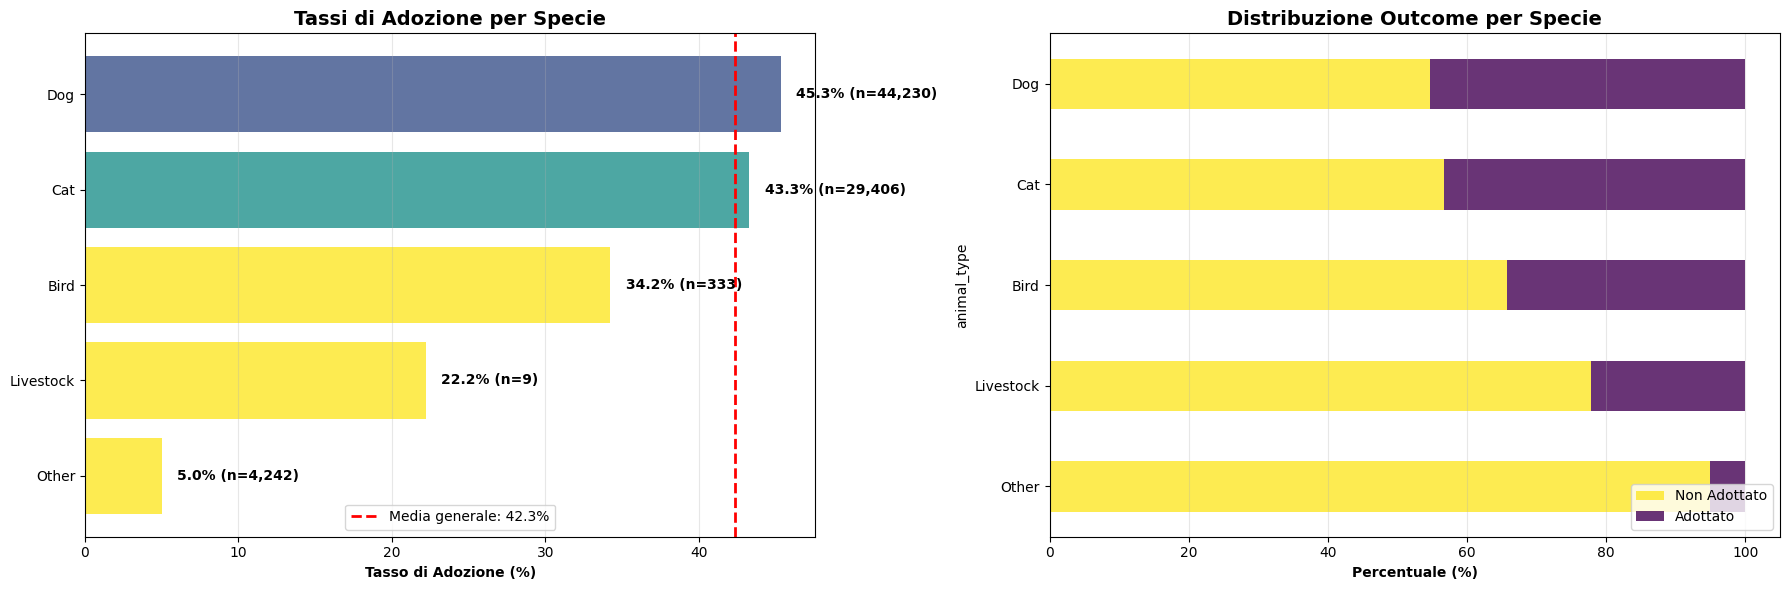

In [172]:
figure,axes=plt.subplots(nrows=1, ncols=2,figsize=(18,6))

# Grafico 1: Tassi di adozione per animal type
ax1 = axes[0]
adoption_rates_sorted = adoption_rates.sort_values('Tasso_Adozione', ascending=True)
colors = ['#3b528b' if x == 'Dog' else '#21918c' if x == 'Cat' else '#fde725' for x in adoption_rates_sorted.index]
bars = ax1.barh(range(len(adoption_rates_sorted)),
                adoption_rates_sorted['Tasso_Adozione'],
                color=colors, alpha=0.8)
ax1.set_yticks(range(len(adoption_rates_sorted)))
ax1.set_yticklabels(adoption_rates_sorted.index)
ax1.set_xlabel('Tasso di Adozione (%)', fontweight='bold')
ax1.set_title('Tassi di Adozione per Specie', fontsize=14, fontweight='bold')
ax1.axvline(shel['adopted'].mean()*100, color='red', linestyle='--',
            linewidth=2, label=f'Media generale: {shel["adopted"].mean()*100:.1f}%')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Aggiungi valori e conteggi
for i, (idx, row) in enumerate(adoption_rates_sorted.iterrows()):
    ax1.text(row['Tasso_Adozione'] + 1, i,
            f"{row['Tasso_Adozione']:.1f}% (n={int(row['N']):,})",
            va='center', fontweight='bold')

# Grafico 2: Stacked bar chart
ax2 = axes[1]

contingency_pct_plot = pd.crosstab(
    shel['animal_type'],
    shel['adopted'],
    normalize='index'
) * 100

# Rinomina esplicitamente le colonne per chiarezza e per la legenda
contingency_pct_plot.columns = ['Non Adottato', 'Adottato']

contingency_pct_plot = contingency_pct_plot.reindex(adoption_rates_sorted.index)

contingency_pct_plot.plot(kind='barh', stacked=True, ax=ax2,
                              color=['#fde725', '#440154'], alpha=0.8)

ax2.set_xlabel('Percentuale (%)', fontweight='bold')
ax2.set_title('Distribuzione Outcome per Specie', fontsize=14, fontweight='bold')
ax2.legend(['Non Adottato', 'Adottato'], loc='lower right')
ax2.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Grazie a quest'analisi otteniamo dei risultati che ci permettono di affermare con certezza che la specie dell'animale ha un effetto significativo sulla probabilità di adozione.

Calcolando il tasso di adozione generale otteniamo che, a prescindere dalla specie, un animale ha il 42.32% di probabilità di essere adottato. Come osserviamo nei grafici, l'animale che ha più probabilià di essere adottati sono i cani con il 45% di probabilità, seguiti dai gatti con il 43% e successivamente tutte le altre specie, che hanno invece probabilità di adozione ben inferiori.

###3.2.3 Adozione vs Sterilizzazione

In [173]:

print("\nSex upon outcome unici:")
print(shel['sex_upon_outcome'].value_counts())

shel_clean = shel[shel['sex_upon_outcome'].notna()].copy()
shel_clean = shel_clean[shel_clean['sex_upon_outcome'] != 'Unknown'].copy()

print(f"Tasso di adozione generale: {shel_clean['adopted'].mean()*100:.2f}%")



# Tabella di contingenza
contingency_table = pd.crosstab(
    shel_clean['sex_upon_outcome'],
    shel_clean['adopted'],
    margins=True
)

print("\nTabella di contingenza (frequenze assolute):")
print(contingency_table)

# Tabella con percentuali per riga
contingency_pct = pd.crosstab(
    shel_clean['sex_upon_outcome'],
    shel_clean['adopted'],
    normalize='index'
) * 100

contingency_pct.columns = ['Non Adottato (%)', 'Adottato (%)']
print("\nPercentuali per Sex upon Outcome (% di riga):")
print(contingency_pct.round(2))

# Calcola i tassi di adozione
adoption_rates = shel_clean.groupby('sex_upon_outcome')['adopted'].agg(['mean', 'count'])
adoption_rates.columns = ['Tasso_Adozione', 'N']
adoption_rates['Tasso_Adozione'] = adoption_rates['Tasso_Adozione'] * 100
adoption_rates = adoption_rates.sort_values('Tasso_Adozione', ascending=False)

print("\nTassi di adozione per Sex upon Outcome:")
print(adoption_rates)


Sex upon outcome unici:
sex_upon_outcome
Neutered Male    27775
Spayed Female    25198
Intact Male       9542
Intact Female     9137
Unknown           6568
Name: count, dtype: int64
Tasso di adozione generale: 46.10%

Tabella di contingenza (frequenze assolute):
adopted               0      1    All
sex_upon_outcome                     
Intact Female      8374    763   9137
Intact Male        8898    644   9542
Neutered Male     11872  15903  27775
Spayed Female      9473  15725  25198
All               38617  33035  71652

Percentuali per Sex upon Outcome (% di riga):
                  Non Adottato (%)  Adottato (%)
sex_upon_outcome                                
Intact Female                91.65          8.35
Intact Male                  93.25          6.75
Neutered Male                42.74         57.26
Spayed Female                37.59         62.41

Tassi di adozione per Sex upon Outcome:
                  Tasso_Adozione      N
sex_upon_outcome                       
Spayed F

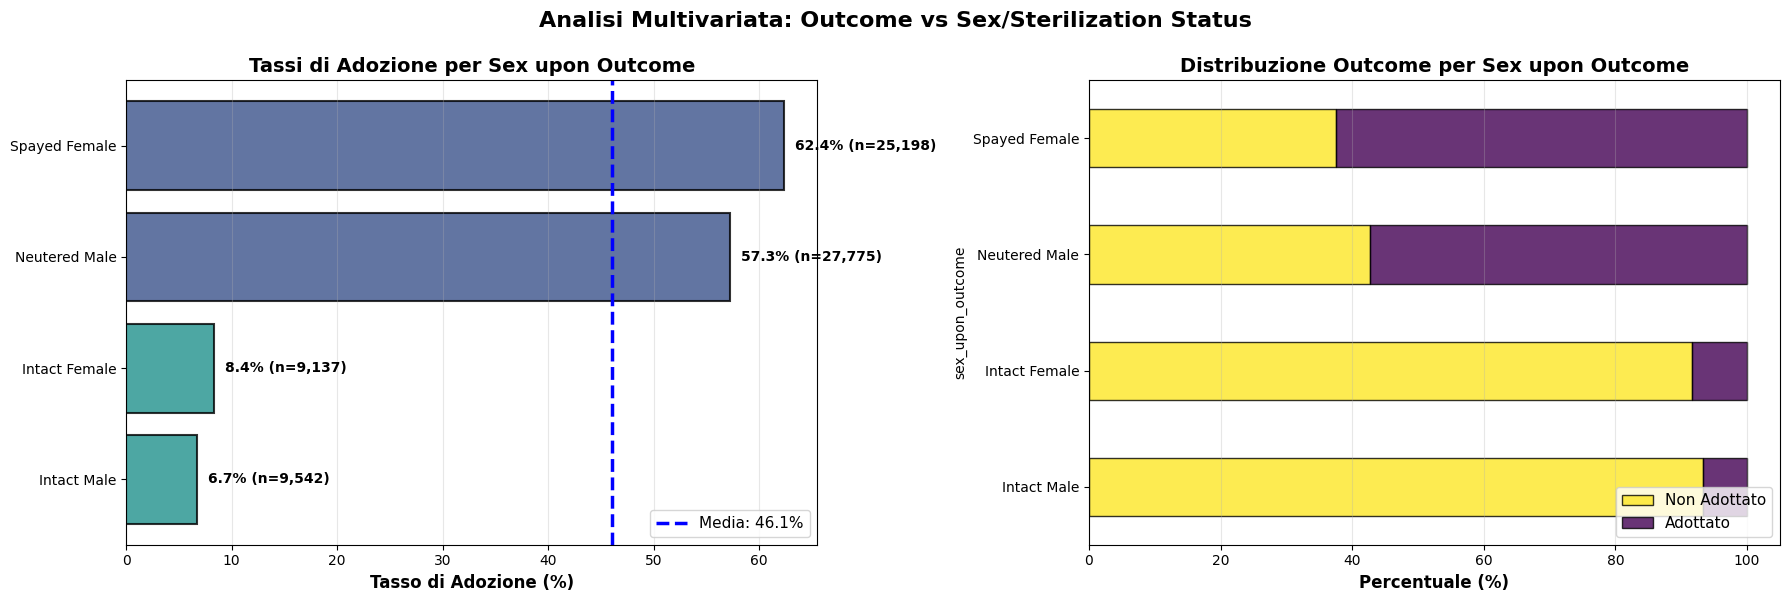

In [174]:
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(18,6))

ax1 = axes[0]
adoption_rates_sorted = adoption_rates.sort_values('Tasso_Adozione', ascending=True)

# Colori basati su sterilizzazione
colors = []
for sex in adoption_rates_sorted.index:
    if 'Neutered' in sex or 'Spayed' in sex:
        colors.append('#3b528b')
    elif 'Intact' in sex:
        colors.append('#21918c')
    else:
        colors.append('#21918c')

bars = ax1.barh(range(len(adoption_rates_sorted)),
                adoption_rates_sorted['Tasso_Adozione'],
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_yticks(range(len(adoption_rates_sorted)))
ax1.set_yticklabels(adoption_rates_sorted.index)
ax1.set_xlabel('Tasso di Adozione (%)', fontweight='bold', fontsize=12)
ax1.set_title('Tassi di Adozione per Sex upon Outcome', fontsize=14, fontweight='bold')
ax1.axvline(shel_clean['adopted'].mean()*100, color='blue', linestyle='--',
            linewidth=2.5, label=f'Media: {shel_clean["adopted"].mean()*100:.1f}%')
ax1.legend(fontsize=11)
ax1.grid(axis='x', alpha=0.3)

# Aggiungi valori
for i, (idx, row) in enumerate(adoption_rates_sorted.iterrows()):
    ax1.text(row['Tasso_Adozione'] + 1, i,
            f"{row['Tasso_Adozione']:.1f}% (n={int(row['N']):,})",
            va='center', fontweight='bold', fontsize=10)

# Grafico 2: Stacked bar chart
ax2 = axes[1]
contingency_pct_plot = pd.crosstab(
    shel_clean['sex_upon_outcome'],
    shel_clean['adopted'],
    normalize='index'
) * 100
contingency_pct_plot = contingency_pct_plot.reindex(adoption_rates_sorted.index)

contingency_pct_plot.plot(kind='barh', stacked=True, ax=ax2,
                          color=['#fde725', '#440154'], alpha=0.8,
                          edgecolor='black', linewidth=1)

ax2.set_xlabel('Percentuale (%)', fontweight='bold', fontsize=12)
ax2.set_title('Distribuzione Outcome per Sex upon Outcome', fontsize=14, fontweight='bold')
ax2.legend(['Non Adottato', 'Adottato'], loc='lower right', fontsize=11)
ax2.grid(axis='x', alpha=0.3)

plt.suptitle('Analisi Multivariata: Outcome vs Sex/Sterilization Status',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

if 'sterilization_status' in shel_clean.columns:
    del shel_clean['sterilization_status']

Come dimostrato dai dati, lo stato di sterilizzazione ha un effetto significativo sull'adozione. Abbiamo infatti osservato come la categoria con la possibilità maggiore di adoziome è Spayed Female con il 62,4% , in netto contrasto con Intact Male che ha un tasso di adozione del 6,7%.

###3.2.4 Adozione vs Periodo dell'anno

In [175]:

# controlliamo che outcome_date sia in formato datetime
if 'outcome_date' in shel.columns:
    shel['outcome_date'] = pd.to_datetime(shel['outcome_date'])

    # Estrai mese e stagione
    shel['month'] = shel['outcome_date'].dt.month
    shel['month_name'] = shel['outcome_date'].dt.month_name()

    # Crea stagioni
    def assign_season(month):
        if month in [12, 1, 2]:
            return 'Inverno'
        elif month in [3, 4, 5]:
            return 'Primavera'
        elif month in [6, 7, 8]:
            return 'Estate'
        else:  # 9, 10, 11
            return 'Autunno'

    shel['season'] = shel['month'].apply(assign_season)

    print("Colonne temporali create: month, month_name, season")
else:
    print("Colonna outcome_date non trovata!")

shel_clean = shel[shel['month'].notna()].copy()

print(f"\nDati puliti: {len(shel_clean):,} record")
print(f"Tasso di adozione generale: {shel_clean['adopted'].mean()*100:.2f}%")
print(f"\nPeriodo analizzato:")
print(f"  Dal: {shel_clean['outcome_date'].min()}")
print(f"  Al: {shel_clean['outcome_date'].max()}")


# 2. ANALISI ESPLORATIVA - STAGIONI


print("\n" + "=" * 70)
print("2. ANALISI ESPLORATIVA - STAGIONI")


# Tabella di contingenza per stagioni
contingency_season = pd.crosstab(
    shel_clean['season'],
    shel_clean['adopted'],
    margins=True
)

print("\nTabella di contingenza Stagioni (frequenze assolute):")
print(contingency_season)

# Percentuali per riga
contingency_season_pct = pd.crosstab(
    shel_clean['season'],
    shel_clean['adopted'],
    normalize='index'
) * 100

contingency_season_pct.columns = ['Non Adottato (%)', 'Adottato (%)']
print("\nPercentuali per Stagione (% di riga):")
print(contingency_season_pct.round(2))

# Tassi di adozione per stagione
adoption_rates_season = shel_clean.groupby('season')['adopted'].agg(['mean', 'count'])
adoption_rates_season.columns = ['Tasso_Adozione', 'N']
adoption_rates_season['Tasso_Adozione'] = adoption_rates_season['Tasso_Adozione'] * 100

# Ordina per ordine naturale delle stagioni
season_order = ['Inverno', 'Primavera', 'Estate', 'Autunno']
adoption_rates_season = adoption_rates_season.reindex(season_order)

print("\nTassi di adozione per Stagione:")
print(adoption_rates_season)


# 3. ANALISI ESPLORATIVA - MESI


print("\n" + "=" * 70)
print("3. ANALISI ESPLORATIVA - MESI")


# Tassi di adozione per mese
adoption_rates_month = shel_clean.groupby(['month', 'month_name'])['adopted'].agg(['mean', 'count'])
adoption_rates_month.columns = ['Tasso_Adozione', 'N']
adoption_rates_month['Tasso_Adozione'] = adoption_rates_month['Tasso_Adozione'] * 100
adoption_rates_month = adoption_rates_month.reset_index()
adoption_rates_month = adoption_rates_month.sort_values('month')

print("\nTassi di adozione per Mese:")
print(adoption_rates_month.to_string(index=False))

# Identifica periodi chiave
print("\n PERIODI SPECIALI:")


# Dicembre (Natale)
if 12 in adoption_rates_month['month'].values:
    dec_rate = adoption_rates_month[adoption_rates_month['month'] == 12]['Tasso_Adozione'].values[0]
    print(f"Dicembre (Natale): {dec_rate:.2f}%")

# Giugno-Agosto (Estate/Vacanze)
summer_months = adoption_rates_month[adoption_rates_month['month'].isin([6, 7, 8])]
if len(summer_months) > 0:
    summer_rate = summer_months['Tasso_Adozione'].mean()
    print(f"Estate (Giu-Ago): {summer_rate:.2f}% (media)")

# Gennaio (Post-Natale)
if 1 in adoption_rates_month['month'].values:
    jan_rate = adoption_rates_month[adoption_rates_month['month'] == 1]['Tasso_Adozione'].values[0]
    print(f"Gennaio (Post-Natale): {jan_rate:.2f}%")

Colonne temporali create: month, month_name, season

Dati puliti: 78,220 record
Tasso di adozione generale: 42.32%

Periodo analizzato:
  Dal: 2013-10-01 09:31:00
  Al: 2018-02-01 18:44:00

2. ANALISI ESPLORATIVA - STAGIONI

Tabella di contingenza Stagioni (frequenze assolute):
adopted        0      1    All
season                        
Autunno    12407   8758  21165
Estate     11564   9714  21278
Inverno     9551   8447  17998
Primavera  11593   6186  17779
All        45115  33105  78220

Percentuali per Stagione (% di riga):
           Non Adottato (%)  Adottato (%)
season                                   
Autunno               58.62         41.38
Estate                54.35         45.65
Inverno               53.07         46.93
Primavera             65.21         34.79

Tassi di adozione per Stagione:
           Tasso_Adozione      N
season                          
Inverno         46.932993  17998
Primavera       34.793858  17779
Estate          45.652787  21278
Autunno        

/tmp/ipython-input-3530707513.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


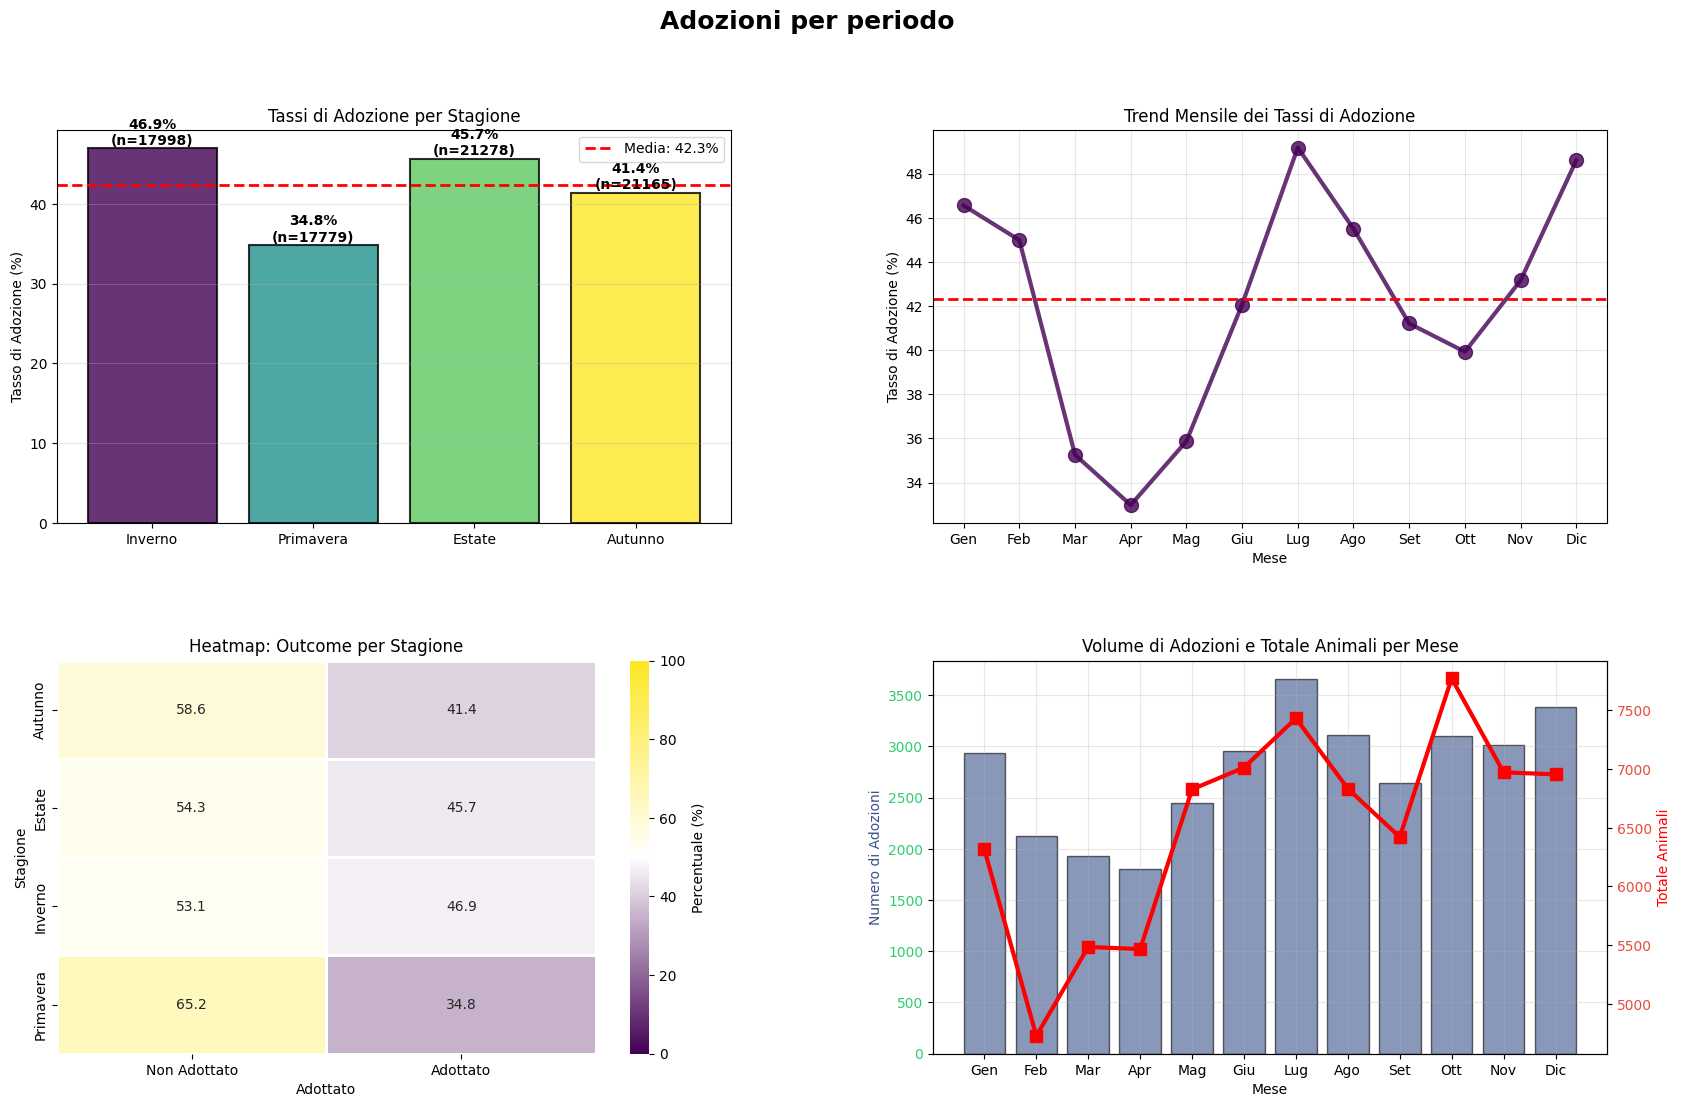

In [176]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)


# Grafico 1: Tassi di adozione per stagione

ax1 = fig.add_subplot(gs[0, 0])

season_colors = {
    'Inverno': '#440154',
    'Primavera': '#21918c',
    'Estate': '#5ec962',
    'Autunno': '#fde725'
}

colors_season = [season_colors.get(s, 'gray') for s in adoption_rates_season.index]

bars = ax1.bar(
    range(len(adoption_rates_season)),
    adoption_rates_season['Tasso_Adozione'],
    color=colors_season,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)

ax1.set_xticks(range(len(adoption_rates_season)))
ax1.set_xticklabels(adoption_rates_season.index)
ax1.set_ylabel('Tasso di Adozione (%)')
ax1.set_title('Tassi di Adozione per Stagione')
ax1.axhline(
    shel_clean['adopted'].mean() * 100,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Media: {shel_clean["adopted"].mean()*100:.1f}%'
)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Aggiungi valori
for i, (idx, row) in enumerate(adoption_rates_season.iterrows()):
    ax1.text(
        i,
        row['Tasso_Adozione'] + 0.5,
        f"{row['Tasso_Adozione']:.1f}%\n(n={int(row['N'])})",
        ha='center',
        fontweight='bold'
    )

# Grafico 2: Trend mensile

ax2 = fig.add_subplot(gs[0, 1])

ax2.plot(
    adoption_rates_month['month'],
    adoption_rates_month['Tasso_Adozione'],
    marker='o',
    linewidth=3,
    markersize=10,
    color='#440154',
    alpha=0.8
)

ax2.set_xlabel('Mese')
ax2.set_ylabel('Tasso di Adozione (%)')
ax2.set_title('Trend Mensile dei Tassi di Adozione')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu',
                     'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])

ax2.axhline(
    shel_clean['adopted'].mean() * 100,
    color='red',
    linestyle='--',
    linewidth=2
)
ax2.grid(alpha=0.3)


# Grafico 3: Heatmap outcome per stagione

viridis_cmap = plt.get_cmap('viridis')
viridis_dark_purple = viridis_cmap(0.0)

bright_yellow = '#fde725'

custom_viridis_fixed_cmap = mcolors.LinearSegmentedColormap.from_list(
    "CustomViridisFixed",
    [viridis_dark_purple, 'white', bright_yellow],
    N=256
)


contingency_season_plot = pd.crosstab(
    shel_clean['season'],
    shel_clean['adopted'],
    normalize='index'
) * 100

ax3 = fig.add_subplot(gs[1, 0])

sns.heatmap(
    contingency_season_plot,
    annot=True,
    fmt='.1f',
    cmap=custom_viridis_fixed_cmap, # Usa la palette con il Giallo fisso
    cbar_kws={'label': 'Percentuale (%)'},
    linewidths=2,
    linecolor='white',
    center=50,
    vmin=0,
    vmax=100,
    ax=ax3
)





ax3.set_xticklabels(['Non Adottato', 'Adottato'])
ax3.set_title('Heatmap: Outcome per Stagione')
ax3.set_xlabel('Adottato')
ax3.set_ylabel('Stagione')


# Grafico 4: Volume di adozioni per mese

ax4 = fig.add_subplot(gs[1, 1])

adoptions_by_month = shel_clean[shel_clean['adopted'] == 1].groupby('month').size()
total_by_month = shel_clean.groupby('month').size()

ax4_twin = ax4.twinx()

# Barre delle adozioni
bars1 = ax4.bar(
    adoptions_by_month.index,
    adoptions_by_month.values,
    alpha=0.6,
    color='#3b528b',
    edgecolor='black',
    linewidth=1
)

# Linea del totale animali
line1 = ax4_twin.plot(
    total_by_month.index,
    total_by_month.values,
    marker='s',
    linewidth=3,
    markersize=8,
    color='red'
)

ax4.set_xlabel('Mese')
ax4.set_ylabel('Numero di Adozioni', color='#3b528b')
ax4_twin.set_ylabel('Totale Animali', color='red')
ax4.set_title('Volume di Adozioni e Totale Animali per Mese')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu',
                     'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
ax4.tick_params(axis='y', labelcolor='#2ecc71')
ax4_twin.tick_params(axis='y', labelcolor='#e74c3c')
ax4.grid(alpha=0.3)

plt.suptitle("Adozioni per periodo", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


Quest'analisi ci rende evidente come ci sia un legame significativo tra il periodo dell'anno e l'adozione. Analizzando sia per mese che per stagione notiamo infatti come la stagione con il tasso più alto di adozioni sia l'inverno, con il 46,9% e la stagione con il tasso più basso sia la primavera, con il 34,7%. Allo stesso tempo però, il mese con il tasso più alto è Luglio (49.18%) e quello con il tasso più basso Aprile (32.98%).
Ponendo invece il focus sui periodi festivi, per vedere se c'era un aumento notiamo che a Dicembre (Natale) il tasso di adozione è del 48.60% (6.28 p.p. vs media),
a Gennaio (Post-Natale) è del 46.56% (4.23 p.p. vs media) e in
Estate (Giu-Ago) è del 45.58% (3.26 p.p. vs media)

###3.2.5 Adozione vs Colore del pelo

In [177]:

# CATEGORIZZAZIONE COLORI


def simplify_color(color):
    """Riduce i colori a macro-categorie per analisi."""
    if pd.isna(color):
        return "Unknown"
    color = color.lower()
    if "black" in color:
        return "Black"
    if "brown" in color or "brindle" in color:
        return "Brown"
    if "white" in color:
        return "White"
    if "orange" in color or "red" in color or "tan" in color:
        return "Orange/Tan"
    if "blue" in color or "gray" in color or "grey" in color:
        return "Gray/Blue"
    if "/" in color or "mix" in color:
        return "Multicolor"
    return "Other"

if 'color' in shel.columns:
    shel["color_group"] = shel["color"].apply(simplify_color)
shel["color_group"] = shel["main_color"].apply(simplify_color)

print("Categorie usate:", shel["color_group"].unique())

shel_clean = shel[shel["color_group"].notna()].copy()
print(f"Dati validi: {len(shel_clean):,}")

# Tabella contingenza
contingency_color = pd.crosstab(shel_clean["color_group"], shel_clean["adopted"])
print("\nTabella di contingenza (colori vs adottati):")
print(contingency_color)

contingency_color_pct = pd.crosstab(
    shel_clean["color_group"], shel_clean["adopted"], normalize="index"
) * 100
contingency_color_pct.columns = ["Non Adottato (%)", "Adottato (%)"]

print("\nPercentuali per colore:")
print(contingency_color_pct.round(2))

# Tassi di adozione
adoption_rates_color = shel_clean.groupby("color_group")["adopted"].agg(["mean", "count"])
adoption_rates_color["mean"] *= 100
adoption_rates_color.columns = ["Tasso_Adozione", "N"]

print("\nTassi di adozione per colore:")
print(adoption_rates_color.sort_values("Tasso_Adozione", ascending=False))

Categorie usate: ['Orange/Tan' 'Brown' 'White' 'Black' 'Gray/Blue' 'Other' 'Multicolor']
Dati validi: 78,220

Tabella di contingenza (colori vs adottati):
adopted          0      1
color_group              
Black        14109  10500
Brown        11501   7795
Gray/Blue     2325   1481
Multicolor    3043   2604
Orange/Tan    3656   2578
Other         1159    898
White         9322   7249

Percentuali per colore:
             Non Adottato (%)  Adottato (%)
color_group                                
Black                   57.33         42.67
Brown                   59.60         40.40
Gray/Blue               61.09         38.91
Multicolor              53.89         46.11
Orange/Tan              58.65         41.35
Other                   56.34         43.66
White                   56.25         43.75

Tassi di adozione per colore:
             Tasso_Adozione      N
color_group                       
Multicolor        46.112980   5647
White             43.745097  16571
Other             4

/tmp/ipython-input-3286819576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


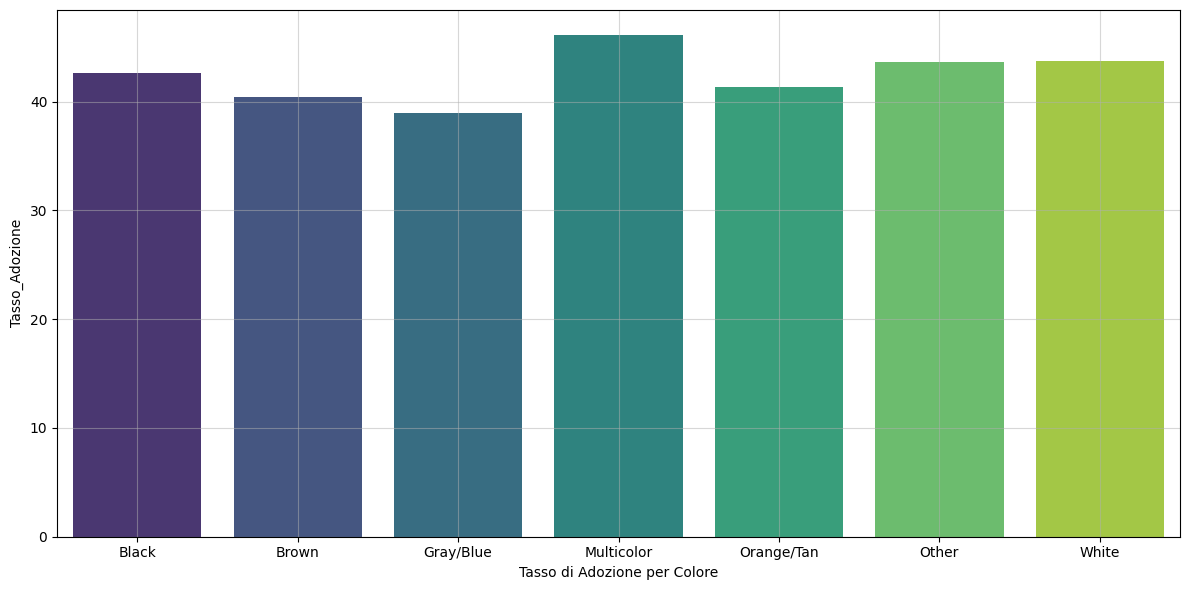

In [178]:
plt.figure(figsize=(12, 6))

# -------- Barplot tassi adozione
sns.barplot(
    data=adoption_rates_color.reset_index(),
    x="color_group",
    y="Tasso_Adozione",
    palette="viridis"
)
plt.xlabel("Tasso di Adozione per Colore")

plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

Da quest'analisi osserviamo una leggera associazione tra il colore del pelo e la probabilità di adozione. Infatti le percentuali delle adozioni tra colori differenti variano di ben poco rispetto al tasso di adozione generale.

#4. Inferenza statistica


Dopo la fase di **Analisi Esplorativa dei Dati (EDA)** che ci ha permesso di visualizzare tendenze e differenze (es. la tendenza dei cuccioli a essere adottati prima, o differenze nel tasso di adozione tra cani e gatti), l'inferenza statistica ha lo scopo di determinare se queste osservazioni sono **statisticamente significative** o se sono semplicemente il risultato di una fluttuazione casuale nel nostro campione di dati.

Per ogni variabile di interesse, seguiremo i passaggi fondamentali dell'inferenza:

1.  **Formulazione di Ipotesi:** Definire l'Ipotesi Nulla ($\mathbf{H_0}$) e l'Ipotesi Alternativa ($\mathbf{H_A}$).
2.  **Scelta e Applicazione del Test:** Utilizzare test appropriati (es. $\mathbf{t-test}$ per medie, $\mathbf{\chi^2}$ per associazioni) in base alla natura delle variabili.
3.  **Interpretazione:** Valutare il $\mathbf{P-value}$ rispetto al livello di significatività ($\mathbf{\alpha = 0.05}$) per trarre una conclusione sul dataset.

##4.1 Analisi 1: Adozione vs. Specie

###4.1.1 Formulazione della domanda

**Domanda di Ricerca:** Esiste un'associazione statisticamente significativa tra il **Tipo di Animale** (`animal_type`) e la probabilità che l'animale venga **Adottato**?

**Ipotesi Statistiche:**
* **$H_0$ (Ipotesi Nulla):** Le variabili sono **indipendenti**. La probabilità di adozione è la stessa, indipendentemente dal tipo di animale.
* **$H_A$ (Ipotesi Alternativa):** Le variabili sono **dipendenti**. Esiste un'associazione tra il tipo di animale e la probabilità di adozione.



###4.1.2 Intervalli di Confidenza
Prima di eseguire il test di associazione, calcoliamo gli intervalli di confidenza al $95\%$ per stimare il tasso di adozione di ogni specie. Questo ci permette di visualizzare se gli intervalli si sovrappongono, suggerendo o meno una differenza significativa.

In [179]:
from statsmodels.stats.proportion import proportion_confint

# Calcolo dei tassi di adozione e CIs per ogni specie
adoption_data = shel.groupby('animal_type')['adopted'].agg(['sum', 'count']).reset_index()
adoption_data.columns = ['animal_type', 'adopted_count', 'total_count']

# Calcolo dell'Intervallo di Confidenza di Wilson (più robusto per proporzioni)
confidence_intervals = adoption_data.apply(
    lambda row: proportion_confint(
        count=row['adopted_count'],
        nobs=row['total_count'],
        alpha=0.05,
        method='wilson'
    ),
    axis=1,
    result_type='expand'
)
confidence_intervals.columns = ['CI_lower', 'CI_upper']

adoption_data = pd.concat([adoption_data, confidence_intervals], axis=1)

# Calcolo e conversione in PERCENTUALE (moltiplicando per 100)
adoption_data['Adoption_Rate'] = (adoption_data['adopted_count'] / adoption_data['total_count']) * 100
adoption_data['CI_lower'] = adoption_data['CI_lower'] * 100
adoption_data['CI_upper'] = adoption_data['CI_upper'] * 100

print("Intervalli di Confidenza al 95% per il Tasso di Adozione (%):")
print(adoption_data[['animal_type', 'Adoption_Rate', 'CI_lower', 'CI_upper']].round(2))


Intervalli di Confidenza al 95% per il Tasso di Adozione (%):
  animal_type  Adoption_Rate  CI_lower  CI_upper
0        Bird          34.23     29.34     39.48
1         Cat          43.28     42.71     43.85
2         Dog          45.33     44.87     45.80
3   Livestock          22.22      6.32     54.74
4       Other           5.00      4.38      5.70


###4.1.3  Scelta del test e interpretazione
Scegliamo il **Test Chi-Quadrato ($\chi^2$) di Pearson**, dato che stiamo testando l'indipendenza tra due variabili entrambe categoriche (`animal_type` e `adopted`). Il test $\chi^2$ confronta le frequenze osservate nella tabella di contingenza con le frequenze che ci aspetteremmo se l'Ipotesi Nulla ($H_0$) fosse vera (ovvero, se l'adozione fosse indipendente dalla specie).

##4.2 Analisi 2: Adozione vs Età

###4.2.1 Formulazione della domanda
Esiste un'associazione statisticamente significativa tra la fascia d'età dell'animale al momento dell'esito e la probabilità che venga adottato? In particolare, le adozioni sono significativamente più probabili per gli animali più giovani (cuccioli) rispetto agli adulti o agli anziani?

**Ipotesi Statistiche:**
* **$H_0$ (Ipotesi Nulla):** La fascia d'età è **indipendente** dalla probabilità di adozione. Il tasso di adozione è lo stesso in tutte le fasce d'età.
* **$H_A$ (Ipotesi Alternativa):** Esiste un'associazione. Gli animali di alcune fasce d'età (tipicamente i più giovani) hanno una probabilità di adozione significativamente diversa.

In [180]:
# Funzione per categorizzare l'età in base ai giorni
def create_age_groups_clean(days):

    # 1 Anno = 365 giorni; 6 Anni = 2190 giorni

    # Fino a 6 mesi (< 183 giorni)
    if days < 183:
        return 'Cucciolo/Kitten'
    # Da 6 mesi a 2 anni (< 730 giorni)
    elif days < 730:
        return 'Giovane'
    # Da 2 anni a 6 anni (< 2190 giorni)
    elif days < 2190:
        return 'Adulto'
    # Oltre 6 anni (>= 2190 giorni)
    else:
        return 'Senior'

# Applicazione della funzione al DataFrame
shel_clean['age_group'] = shel_clean['age_at_outcome_days'].apply(create_age_groups_clean)

print("Distribuzione delle nuove fasce d'età:")
print(shel_clean['age_group'].value_counts())

Distribuzione delle nuove fasce d'età:
age_group
Cucciolo/Kitten    26455
Adulto             22029
Giovane            20752
Senior              8984
Name: count, dtype: int64


###4.2.2 Intervalli di confidenza
Calcoliamo gli intervalli di confidenza al $95\%$ per il tasso di adozione di ciascuna fascia d'età. Questo ci permette di visualizzare immediatamente se gli intervalli per i cuccioli (Puppy) e gli anziani (Senior) si sovrappongono, indicando o meno una differenza significativa nelle loro probabilità di adozione.

In [181]:
# Calcolo dei tassi di adozione e CIs per la fascia d'età
adoption_data_age = shel_clean.groupby('age_group')['adopted'].agg(['sum', 'count']).reset_index()
adoption_data_age.columns = ['age_group', 'adopted_count', 'total_count']

# Calcolo dell'Intervallo di Confidenza di Wilson
confidence_intervals_age = adoption_data_age.apply(
    lambda row: proportion_confint(
        count=row['adopted_count'],
        nobs=row['total_count'],
        alpha=0.05,
        method='wilson'
    ),
    axis=1,
    result_type='expand'
)
confidence_intervals_age.columns = ['CI_lower', 'CI_upper']

adoption_data_age = pd.concat([adoption_data_age, confidence_intervals_age], axis=1)

# Conversione in PERCENTUALE
adoption_data_age['Adoption_Rate'] = (adoption_data_age['adopted_count'] / adoption_data_age['total_count']) * 100
adoption_data_age['CI_lower'] = adoption_data_age['CI_lower'] * 100
adoption_data_age['CI_upper'] = adoption_data_age['CI_upper'] * 100

print("Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Fascia d'Età")
print(adoption_data_age[['age_group', 'Adoption_Rate', 'CI_lower', 'CI_upper']].round(2))

Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Fascia d'Età
         age_group  Adoption_Rate  CI_lower  CI_upper
0           Adulto          35.56     34.93     36.19
1  Cucciolo/Kitten          51.33     50.73     51.93
2          Giovane          43.59     42.91     44.26
3           Senior          29.46     28.53     30.41


La differenza di oltre 20 punti percentuali nel tasso di adozione tra gli animali più giovani e quelli più anziani è altamente significativa. L'età è un fattore cruciale.

###4.2.3 Scelta del test e interpretazione
Test Selezionato:Test Chi-Quadrato ($\chi^2$) di Pearson.
Per confrontare la variabile categorica d'età (`age_group`) con l'esito binario (`adopted`), il Chi-Quadrato è il primo strumento inferenziale appropriato.



In [182]:
# TEST CHI-QUADRATO: FASCIA D'ETÀ
print("TEST CHI-QUADRATO: Fascia d'Età vs. Adozione")


contingency_table_age = pd.crosstab(shel_clean['age_group'], shel_clean['adopted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table_age)

print(f"\nChi-quadrato Statistica: {chi2:.4f}")

# Gestione P-value
if p_value < 1e-300:
    print(f"P-value: < 1e-300 (praticamente zero)")
elif p_value < 0.0001:
    print(f"P-value: {p_value:.2e} (< 0.0001)")
else:
    print(f"P-value: {p_value:.6f}")

print(f"Gradi di libertà: {dof}")

# Interpretazione Significatività
if p_value < 0.001:
    print(f"\nRisultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)")
    print("  C'è una FORTE associazione tra età e probabilità di adozione")
elif p_value < 0.05:
    print("\nRisultato: SIGNIFICATIVO (p < 0.05)")
else:
    print("\nRisultato: NON SIGNIFICATIVO (p ≥ 0.05)")

# Cramér's V (Rilevanza Pratica)
n = len(shel_clean)
min_dim = min(contingency_table_age.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nCramér's V: {cramers_v:.4f}")
if cramers_v < 0.1:
    print("  Associazione DEBOLE")
elif cramers_v < 0.3:
    print("  Associazione MODERATA")
else:
    print("  Associazione FORTE")

TEST CHI-QUADRATO: Fascia d'Età vs. Adozione

Chi-quadrato Statistica: 1914.8978
P-value: < 1e-300 (praticamente zero)
Gradi di libertà: 3

Risultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)
  C'è una FORTE associazione tra età e probabilità di adozione

Cramér's V: 0.1565
  Associazione MODERATA


L'analisi inferenziale sull'associazione tra Fascia d'Età e Esito di Adozione ha prodotto i seguenti risultati:

#### 1. Significatività Statistica (P-value)
* **P-value:** Estremamente basso ($P < 1 \times 10^{-300}$).
* Si rifiuta l'Ipotesi Nulla ($\mathbf{H_0}$). La differenza nei tassi di adozione tra le fasce d'età è **altamente significativa**.

#### 2. Rilevanza Pratica (Forza dell'Associazione)
* **Cramér's V:** $\mathbf{0.1565}$
* **Conclusione:** L'associazione è classificata come **MODERATA** ($\mathbf{0.1 \leq V < 0.3}$).


Il risultato è cruciale perché, a differenza di altre variabili analizzate (es. Stagione, dove l'associazione era "DEBOLE" con $\text{Cramér's V} \approx 0.09$), l'**Età** è l'unico fattore che mostra un'associazione di forza **MODERATA**.

Questo significa che:
* L'associazione tra Età e Adozione non è solo un fenomeno statisticamente **reale** (significativo), ma è anche **praticamente rilevante** (forza moderata).
* La Fascia d'Età è un **forte predittore** della probabilità di adozione ed è il fattore più influente trovato finora.

In [183]:
# TEST CHI-QUADRATO
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(shel['animal_type'], shel['adopted']))

# Set the significance level (alpha)
alpha = 0.00005
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("\nEsiste una associazione significativa tra 'adopted' e 'animal_type'.")
else:
    print("\nNon esiste una associazione significativa tra 'adopted' e 'animal_type.")

Chi-Square Statistic: 2606.449216337737
p-value: 0.0

Esiste una associazione significativa tra 'adopted' e 'animal_type'.


Data l'elevata dimensione del campione ($N > 78.000$), il Test Chi-Quadrato risulta quasi sempre statisticamente significativo ($\mathbf{P-value \approx 0}$), indicando che l'associazione **esiste**.

Tuttavia, per determinare se questa associazione è anche **praticamente rilevante**, dobbiamo concentrarci sulla dimensione dell'effetto, misurata dal $\mathbf{Cramer's V}$.

* Se $\text{Cramer's V}$ è alto ($>0.3$):L'associazione è forte ed è una variabile chiave.
* Se $\text{Cramer's V}$ è basso ($<0.001$): L'associazione è statisticamente *significativa*, ma l'effetto è troppo *debole* per avere una rilevanza pratica nella gestione del rifugio.

In [184]:
# Cramer's V
n = len(shel)
min_dim = min(len(pd.crosstab(shel['animal_type'], shel['adopted']).index) - 1,
              len(pd.crosstab(shel['animal_type'], shel['adopted']).columns) - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nCramér's V: {cramers_v:.4f}")
if cramers_v < 0.1:
    print("  Associazione DEBOLE (effetto piccolo)")
elif cramers_v < 0.3:
    print("  Associazione MODERATA (effetto medio)")
else:
    print("  Associazione FORTE (effetto grande)")


#TEST Z PER CONFRONTO PROPORZIONI (a coppie)
print("\n TEST Z - CONFRONTO A COPPIE")

from statsmodels.stats.proportion import proportions_ztest

# Confronta Dogs vs Cats (i due gruppi principali)
dogs = shel[shel['animal_type'] == 'Dog']
cats = shel[shel['animal_type'] == 'Cat']

if len(dogs) > 0 and len(cats) > 0:
    counts = np.array([dogs['adopted'].sum(), cats['adopted'].sum()])
    nobs = np.array([len(dogs), len(cats)])

    z_stat, p_val = proportions_ztest(counts, nobs)

    print(f"\nConfronto Dogs vs Cats:")
    print(f"  Tasso adozione Dogs: {dogs['adopted'].mean()*100:.2f}%")
    print(f"  Tasso adozione Cats: {cats['adopted'].mean()*100:.2f}%")
    print(f"  Differenza: {(dogs['adopted'].mean() - cats['adopted'].mean())*100:.2f} punti percentuali")
    print(f"  Z-statistic: {z_stat:.4f}")
    print(f"  P-value: {p_val:.4e}")

    if p_val < 0.05:
        if dogs['adopted'].mean() > cats['adopted'].mean():
            print("I CANI hanno probabilità di adozione SIGNIFICATIVAMENTE PIÙ ALTA dei gatti")
        else:
            print("I GATTI hanno probabilità di adozione SIGNIFICATIVAMENTE PIÙ ALTA dei cani")
    else:
        print("NON c'è differenza significativa tra cani e gatti")





Cramér's V: 0.1825
  Associazione MODERATA (effetto medio)

 TEST Z - CONFRONTO A COPPIE

Confronto Dogs vs Cats:
  Tasso adozione Dogs: 45.33%
  Tasso adozione Cats: 43.28%
  Differenza: 2.05 punti percentuali
  Z-statistic: 5.4846
  P-value: 4.1437e-08
I CANI hanno probabilità di adozione SIGNIFICATIVAMENTE PIÙ ALTA dei gatti


##4.3 Analisi 3: Adozione vs Periodo


###4.3.1 Formulazione della domanda
Esiste un'associazione statisticamente significativa tra la stagione di uscita dell'animale e la probabilità che venga adottato?

**Ipotesi Statistiche:**
* **$H_0$ (Ipotesi Nulla):** La stagione è **indipendente** dalla probabilità di adozione. Il tasso di adozione è lo stesso in tutte le stagioni.
* **$H_A$ (Ipotesi Alternativa):** Esiste un'associazione tra la stagione e l'adozione. Ad esempio, il tasso di adozione potrebbe essere significativamente più alto in estate a causa del picco di cuccioli ("Puppy Season").

###4.3.2 Intervalli di confidenza
Stimare l'intervallo di confidenza per il tasso di adozione di ogni stagione ha senso in questo caso: è il modo più efficace per visualizzare se ci sono differenze reali.


Calcoliamo gli intervalli di confidenza al $95\%$ per il tasso di adozione di ciascuna stagione per determinare se gli intervalli si sovrappongono. L'assenza di sovrapposizione tra i $CI$ è una forte indicazione di una differenza statisticamente significativa.

In [185]:
adoption_data_season = shel_clean.groupby('season')['adopted'].agg(['sum', 'count']).reset_index()
adoption_data_season.columns = ['season', 'adopted_count', 'total_count']

# Calcolo dell'Intervallo di Confidenza di Wilson (più robusto per proporzioni)
confidence_intervals_season = adoption_data_season.apply(
    lambda row: proportion_confint(
        count=row['adopted_count'],
        nobs=row['total_count'],
        alpha=0.05,
        method='wilson'
    ),
    axis=1,
    result_type='expand'
)
confidence_intervals_season.columns = ['CI_lower', 'CI_upper']

adoption_data_season = pd.concat([adoption_data_season, confidence_intervals_season], axis=1)

# Conversione in PERCENTUALE
adoption_data_season['Adoption_Rate'] = (adoption_data_season['adopted_count'] / adoption_data_season['total_count']) * 100
adoption_data_season['CI_lower'] = adoption_data_season['CI_lower'] * 100
adoption_data_season['CI_upper'] = adoption_data_season['CI_upper'] * 100

print("Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Stagione")
print(adoption_data_season[['season', 'Adoption_Rate', 'CI_lower', 'CI_upper']].round(2))

Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Stagione
      season  Adoption_Rate  CI_lower  CI_upper
0    Autunno          41.38     40.72     42.04
1     Estate          45.65     44.98     46.32
2    Inverno          46.93     46.20     47.66
3  Primavera          34.79     34.10     35.50


### 4.3.3  Scelta del test e interpretazione
Procediamo con un Test Chi-Quadrato ($\chi^2$) di Pearson: confrontiamo due variabili categoriche (`season` e `adopted`) per verificarne l'indipendenza.

In [186]:
print("TEST CHI-QUADRATO - STAGIONI")
chi2_season, p_value_season, dof_season, expected_season = stats.chi2_contingency(
    pd.crosstab(shel_clean['season'], shel_clean['adopted'])
)

print(f"\nChi-quadrato: {chi2_season:.4f}")

if p_value_season < 1e-300:
    print(f"P-value: < 1e-300 (praticamente zero)")
elif p_value_season < 0.0001:
    print(f"P-value: {p_value_season:.2e} (< 0.0001)")
else:
    print(f"P-value: {p_value_season:.6f}")

print(f"Gradi di libertà: {dof_season}")

if p_value_season < 0.001:
    print(f"\nRisultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)")
    print("  La STAGIONE ha un effetto significativo sulla probabilità di adozione")
elif p_value_season < 0.05:
    print("\nRisultato: SIGNIFICATIVO (p < 0.05)")
    print("  La stagione ha un effetto sulla probabilità di adozione")
else:
    print("\nRisultato: NON SIGNIFICATIVO (p ≥ 0.05)")
    print("  La stagione NON sembra influenzare la probabilità di adozione")

# Cramér's V per stagioni
n = len(shel_clean)
min_dim_season = min(len(season_order) - 1, 1)
cramers_v_season = np.sqrt(chi2_season / (n * min_dim_season))

print(f"\nCramér's V: {cramers_v_season:.4f}")
if cramers_v_season < 0.1:
    print("Associazione DEBOLE")
elif cramers_v_season < 0.3:
    print("Associazione MODERATA")
else:
    print("Associazione FORTE")

# 5. TEST CHI-QUADRATO - MESI

print("\n\n" + "-" * 70)
print("TEST CHI-QUADRATO - MESI")


chi2_month, p_value_month, dof_month, expected_month = stats.chi2_contingency(
    pd.crosstab(shel_clean['month'], shel_clean['adopted'])
)

print(f"\nChi-quadrato: {chi2_month:.4f}")

if p_value_month < 1e-300:
    print(f"P-value: < 1e-300 (praticamente zero)")
elif p_value_month < 0.0001:
    print(f"P-value: {p_value_month:.2e} (< 0.0001)")
else:
    print(f"P-value: {p_value_month:.6f}")

print(f"Gradi di libertà: {dof_month}")

if p_value_month < 0.001:
    print(f"\nRisultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)")
    print("  Il MESE ha un effetto significativo sulla probabilità di adozione")
elif p_value_month < 0.05:
    print("\nRisultato: SIGNIFICATIVO (p < 0.05)")
else:
    print("\nRisultato: NON SIGNIFICATIVO (p ≥ 0.05)")

# CONFRONTI A COPPIE - STAGIONI
print("\n\n" + "-" * 70)
print("CONFRONTI A COPPIE - STAGIONI CHIAVE")

from statsmodels.stats.proportion import proportions_ztest

# Confronti interessanti
season_comparisons = [
    ('Estate', 'Inverno'),
    ('Primavera', 'Autunno'),
    ('Estate', 'Autunno')
]

for season1, season2 in season_comparisons:
    group1 = shel_clean[shel_clean['season'] == season1]
    group2 = shel_clean[shel_clean['season'] == season2]

    if len(group1) > 0 and len(group2) > 0:
        counts = np.array([group1['adopted'].sum(), group2['adopted'].sum()])
        nobs = np.array([len(group1), len(group2)])

        z_stat, p_val = proportions_ztest(counts, nobs)

        print(f"\nConfronto {season1} vs {season2}:")
        print(f"  Tasso {season1}: {group1['adopted'].mean()*100:.2f}%")
        print(f"  Tasso {season2}: {group2['adopted'].mean()*100:.2f}%")
        print(f"  Differenza: {(group1['adopted'].mean() - group2['adopted'].mean())*100:.2f} punti %")
        print(f"  Z-statistic: {z_stat:.4f}")
        print(f"  P-value: {p_val:.4e}")

        if p_val < 0.05:
            if group1['adopted'].mean() > group2['adopted'].mean():
                print(f" {season1.upper()} ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA")
            else:
                print(f"{season2.upper()} ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA")
        else:
            print("NON c'è differenza significativa")





TEST CHI-QUADRATO - STAGIONI

Chi-quadrato: 673.9297
P-value: 9.44e-146 (< 0.0001)
Gradi di libertà: 3

Risultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)
  La STAGIONE ha un effetto significativo sulla probabilità di adozione

Cramér's V: 0.0928
Associazione DEBOLE


----------------------------------------------------------------------
TEST CHI-QUADRATO - MESI

Chi-quadrato: 791.4015
P-value: 1.33e-162 (< 0.0001)
Gradi di libertà: 11

Risultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)
  Il MESE ha un effetto significativo sulla probabilità di adozione


----------------------------------------------------------------------
CONFRONTI A COPPIE - STAGIONI CHIAVE

Confronto Estate vs Inverno:
  Tasso Estate: 45.65%
  Tasso Inverno: 46.93%
  Differenza: -1.28 punti %
  Z-statistic: -2.5355
  P-value: 1.1230e-02
INVERNO ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA

Confronto Primavera vs Autunno:
  Tasso Primavera: 34.79%
  Tasso Autunno: 41.38%
  Differenza: -6.59 punti %
  Z-statistic: -13.3122
  

Di seguito, le conclusioni che abbaìiamo trato dai test effettuati:




* P-value ($\approx 0$ per entrambi): sia il test per Stagione che quello per Mese sono risultati ALTAMENTE SIGNIFICATIVI.


Questo ci permette di rifiutare l'ipotesi nulla ($\mathbf{H_0}$): c'è una relazione reale tra il periodo dell'anno (sia esso $\text{Stagione}$ o $\text{Mese}$) e la probabilità che un animale venga adottato.


La differenza osservata $\mathbf{non}$ è dovuta al caso.  

* Cramér's V (Stagioni): $\approx 0.093$: nonostante l'associazione esista (P-value basso), la sua forza è DEBOLE.

Questo ci porta alla conclusione che la stagione dell'anno ha un impatto statisticamente misurabile sull'adozione, *ma l'entità dell'effetto è piccola*. In pratica la stagione da sola non è il fattore principale che determina se un animale sarà adottato o meno. È un fattore minoritario.

* Il test a coppie e l'analisi degli intervalli di condenza identificano esattamente dove si manifesta il (debole) effetto temporale:

| Confronto | Differenza Tasso | P-value | Risultato (CI Non-Sovrapposti) | Rilevanza Pratica |
| :---: | :---: | :---: | :---: | :--- |
| Primavera vs. Autunno | $-6.59$ p.p. | $1.96 \times 10^{-40}$ | **AUTUNNO** è significativamente più alto. | È la differenza più marcata tra le stagioni (più rilevante). |
| Estate vs. Autunno | $+4.27$ p.p. | $6.79 \times 10^{-19}$ | **ESTATE** è significativamente più alta. | Forte evidenza di un picco estivo. |
| Estate vs. Inverno | $-1.28$ p.p. | $1.12 \times 10^{-02}$ | **INVERNO** è significativamente più alto. | La differenza è reale, ma molto esigua (vicina alla soglia di significatività). |

##4.4 Analisi 4: Adozione vs colore del pelo

###4.4.1 Formulazione della domanda
Esiste un'associazione statisticamente significativa tra il **Colore Dominante** dell'animale e la probabilità che venga **Adottato**?

**Ipotesi Statistiche:**
* **$H_0$ (Ipotesi Nulla):** Il colore dominante è **indipendente** dalla probabilità di adozione. Il tasso di adozione è lo stesso per tutti i colori.
* **$H_A$ (Ipotesi Alternativa):** Esiste un'associazione. Gli animali di alcuni colori (es. neri o grigi) hanno una probabilità di adozione significativamente diversa.

### 4.4.2 Intervalli di confidenza

In [187]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

# Calcolo dei tassi di adozione e CIs per i gruppi di colore
adoption_data_color = shel_clean.groupby('color_group')['adopted'].agg(['sum', 'count']).reset_index()
adoption_data_color.columns = ['color_group', 'adopted_count', 'total_count']

# Calcolo dell'Intervallo di Confidenza di Wilson
confidence_intervals_color = adoption_data_color.apply(
    lambda row: proportion_confint(
        count=row['adopted_count'],
        nobs=row['total_count'],
        alpha=0.05,
        method='wilson'
    ),
    axis=1,
    result_type='expand'
)
confidence_intervals_color.columns = ['CI_lower', 'CI_upper']

adoption_data_color = pd.concat([adoption_data_color, confidence_intervals_color], axis=1)

# Conversione in PERCENTUALE
adoption_data_color['Adoption_Rate'] = (adoption_data_color['adopted_count'] / adoption_data_color['total_count']) * 100
adoption_data_color['CI_lower'] = adoption_data_color['CI_lower'] * 100
adoption_data_color['CI_upper'] = adoption_data_color['CI_upper'] * 100

print("Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Gruppo Colore")
print(adoption_data_color[['color_group', 'Adoption_Rate', 'CI_lower', 'CI_upper']].round(2))

Intervalli di Confidenza al 95% per il Tasso di Adozione (%): per Gruppo Colore
  color_group  Adoption_Rate  CI_lower  CI_upper
0       Black          42.67     42.05     43.29
1       Brown          40.40     39.71     41.09
2   Gray/Blue          38.91     37.38     40.47
3  Multicolor          46.11     44.82     47.42
4  Orange/Tan          41.35     40.14     42.58
5       Other          43.66     41.53     45.81
6       White          43.75     42.99     44.50


### 1. Differenze Statistiche (Non-Sovrapposizione)

* **Multicolor (Più Alto) vs. Gray/Blue (Più Basso):** L'intervallo di $\mathbf{Multicolor}$ non si sovrappone a quello di $\mathbf{Gray/Blue}$ (il minimo di $\text{Multicolor}$ è $44.82\%$, superiore al massimo di $\text{Gray/Blue}$ $40.47\%$).
    * **Conclusione:** Il tasso di adozione degli animali **Multicolor** è **significativamente più alto** di quello degli animali $\text{Gray/Blue}$.

* **Black vs. Gray/Blue:** L'intervallo di $\mathbf{Black}$ non si sovrappone a quello di $\mathbf{Gray/Blue}$.
    * **Conclusione:** Gli animali **Neri** hanno un tasso di adozione **significativamente più alto** degli animali $\text{Gray/Blue}$.


* **Black vs. White:** I due intervalli mostrano una **leggera sovrapposizione** ($42.99\%$ - $43.29\%$).
    * **Conclusione Preliminare:** La differenza tra l'adozione di animali bianchi e neri **non è statisticamente forte** e potrebbe non essere significativa. L'ipotetico "**Black Dog Bias**" non è supportato in modo schiacciante, poiché il nero ha un tasso simile a quello bianco (e superiore al grigio).

* **Tassi di Adozione:** I $\text{CI}$ coprono un intervallo totale relativamente **ristretto** (dal $37.38\%$ al $47.42\%$). Questa escursione limitata suggerisce che, come per la Stagione, il **Colore** potrebbe essere un predittore **più debole** rispetto all'Età.

###4.4.3  Scelta del test e interpretazione

In [188]:
# Perform the Chi-Square Test for Independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(shel_clean["main_color"], shel_clean["adopted"]))

# Set the significance level (alpha)
alpha = 0.0005
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
if p < alpha:
    print("\n Esiste una associazione significativa tra 'main_color' e 'adottato' .")
else:
    print("\nNon esiste una associazione significativa tra  'main_color' e 'adottato'.")


Chi-Square Statistic: 123.07383546570932
p-value: 1.2019075410633062e-21

 Esiste una associazione significativa tra 'main_color' e 'adottato' .


In [189]:

#TEST CHI-QUADRATO

print("TEST CHI-QUADRATO")


chi2_color, p_value_color, dof_color, expected_color = stats.chi2_contingency(
    pd.crosstab(shel_clean["color_group"], shel_clean["adopted"])
)

print(f"\nChi-quadrato: {chi2_color:.4f}")
print(f"P-value: {p_value_color:.6f}")
print(f"Gradi di libertà: {dof_color}")

if p_value_color < 0.001:
    print("ALTAMENTE SIGNIFICATIVO → Il colore influisce sull’adozione")
elif p_value_color < 0.05:
    print("SIGNIFICATIVO → Il colore ha effetto sull’adozione")
else:
    print("NON significativo → Nessuna evidenza di effetto del colore")

# Cramér's V
n = len(shel_clean)
min_dim = min(contingency_color.shape) - 1
cramers_v = np.sqrt(chi2_color / (n * min_dim))

print(f"\nCramér's V: {cramers_v:.4f}")

# CONFRONTI A COPPIE


print("CONFRONTI A COPPIE TRA COLORI")


colors = adoption_rates_color.index.tolist()

for i in range(len(colors)):
    for j in range(i + 1, len(colors)):
        c1, c2 = colors[i], colors[j]
        g1 = shel_clean[shel_clean["color_group"] == c1]
        g2 = shel_clean[shel_clean["color_group"] == c2]

        counts = np.array([g1["adopted"].sum(), g2["adopted"].sum()])
        nobs = np.array([len(g1), len(g2)])

        z_stat, p_val = proportions_ztest(counts, nobs)

        print(f"\nConfronto: {c1} vs {c2}")
        print(f"  Tasso {c1}: {g1['adopted'].mean()*100:.2f}%")
        print(f"  Tasso {c2}: {g2['adopted'].mean()*100:.2f}%")
        print(f"  P-value: {p_val:.4f}")

TEST CHI-QUADRATO

Chi-quadrato: 99.5094
P-value: 0.000000
Gradi di libertà: 6
ALTAMENTE SIGNIFICATIVO → Il colore influisce sull’adozione

Cramér's V: 0.0357
CONFRONTI A COPPIE TRA COLORI

Confronto: Black vs Brown
  Tasso Black: 42.67%
  Tasso Brown: 40.40%
  P-value: 0.0000

Confronto: Black vs Gray/Blue
  Tasso Black: 42.67%
  Tasso Gray/Blue: 38.91%
  P-value: 0.0000

Confronto: Black vs Multicolor
  Tasso Black: 42.67%
  Tasso Multicolor: 46.11%
  P-value: 0.0000

Confronto: Black vs Orange/Tan
  Tasso Black: 42.67%
  Tasso Orange/Tan: 41.35%
  P-value: 0.0609

Confronto: Black vs Other
  Tasso Black: 42.67%
  Tasso Other: 43.66%
  P-value: 0.3840

Confronto: Black vs White
  Tasso Black: 42.67%
  Tasso White: 43.75%
  P-value: 0.0303

Confronto: Brown vs Gray/Blue
  Tasso Brown: 40.40%
  Tasso Gray/Blue: 38.91%
  P-value: 0.0877

Confronto: Brown vs Multicolor
  Tasso Brown: 40.40%
  Tasso Multicolor: 46.11%
  P-value: 0.0000

Confronto: Brown vs Orange/Tan
  Tasso Brown: 40.40%

##4.5 Analisi 5: Adozione vs Sterilizzazione

###4.5.1 Formulazione della domanda
**Domanda di Ricerca:** Esiste un'associazione statisticamente significativa tra lo **Stato di Sterilizzazione di Animale** (`sex_upon_outcome`) e la probabilità che l'animale venga **Adottato**?

**Ipotesi Statistiche:**
* **$H_0$ (Ipotesi Nulla):** Le variabili sono **indipendenti**. La probabilità di adozione è la stessa, indipendentemente dal sesso o dall'avvenuta sterilizzazione o meno dell'animale.
* **$H_A$ (Ipotesi Alternativa):** Le variabili sono **dipendenti**. Esiste un'associazione tra il sesso dell' animale e la probabilità di adozione.


###4.5.2 Intervalli di confidenza
Prima di eseguire il test di associazione, calcoliamo gli intervalli di confidenza al 95% per stimare il tasso di adozione in base allo stato riproduttivo dell'animale. Questo ci permette di visualizzare se gli intervalli si sovrappongono, suggerendo o meno una differenza significativa tra le diverse categorie.

In [190]:
from statsmodels.stats.proportion import proportion_confint

# Calcolo dei tassi di adozione e CIs per ogni categoria di sex upon outcome
adoption_data = shel.groupby('sex_upon_outcome')['adopted'].agg(['sum', 'count']).reset_index()
adoption_data.columns = ['sex_upon_outcome', 'adopted_count', 'total_count']

# Calcolo dell'Intervallo di Confidenza di Wilson (più robusto per proporzioni)
confidence_intervals = adoption_data.apply(
    lambda row: proportion_confint(
        count=row['adopted_count'],
        nobs=row['total_count'],
        alpha=0.05,
        method='wilson'
    ),
    axis=1,
    result_type='expand'
)
confidence_intervals.columns = ['CI_lower', 'CI_upper']
adoption_data = pd.concat([adoption_data, confidence_intervals], axis=1)

# Calcolo e conversione in PERCENTUALE (moltiplicando per 100)
adoption_data['Adoption_Rate'] = (adoption_data['adopted_count'] / adoption_data['total_count']) * 100
adoption_data['CI_lower'] = adoption_data['CI_lower'] * 100
adoption_data['CI_upper'] = adoption_data['CI_upper'] * 100

print("Intervalli di Confidenza al 95% per il Tasso di Adozione per Stato Riproduttivo (%):")
print(adoption_data[['sex_upon_outcome', 'Adoption_Rate', 'CI_lower', 'CI_upper']].round(2))

Intervalli di Confidenza al 95% per il Tasso di Adozione per Stato Riproduttivo (%):
  sex_upon_outcome  Adoption_Rate  CI_lower  CI_upper
0    Intact Female           8.35      7.80      8.94
1      Intact Male           6.75      6.26      7.27
2    Neutered Male          57.26     56.67     57.84
3    Spayed Female          62.41     61.81     63.00
4          Unknown           1.07      0.84      1.34


###4.5.3 Scelta del test e interpretazione


Procediamo con un Test Chi-Quadrato ($\chi^2$) di Pearson: confrontiamo due variabili categoriche (`sex_upon_outcome` e `adopted`) per verificarne l'indipendenza.

In [191]:
# Perform the Chi-Square Test for Independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(shel_clean['sex_upon_outcome'], shel_clean['adopted']))

# Set the significance level (alpha)
alpha = 0.00005
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret the results
if p < alpha:
    print("\nEsiste una associazione significativa tra 'adopted' e 'sex upon outcome'.")
else:
    print("\nNon esiste una associazione significativa tra 'adopted' e 'sex upon outcome'.")


Chi-Square Statistic: 20547.309488070725
p-value: 0.0

Esiste una associazione significativa tra 'adopted' e 'sex upon outcome'.


In [192]:

#TEST CHI-QUADRATO

print(" TEST CHI-QUADRATO DI PEARSON")


chi2, p_value, dof, expected = stats.chi2_contingency(
    pd.crosstab(shel_clean['sex_upon_outcome'], shel_clean['adopted'])
)

print(f"\nChi-quadrato: {chi2:.4f}")

if p_value < 1e-300:
    print(f"P-value: < 1e-300 (praticamente zero)")
elif p_value < 0.0001:
    print(f"P-value: {p_value:.2e} (< 0.0001)")
else:
    print(f"P-value: {p_value:.6f}")

print(f"Gradi di libertà: {dof}")

print(f"\nFrequenze attese:")
expected_df = pd.DataFrame(
    expected,
    index=pd.crosstab(shel_clean['sex_upon_outcome'], shel_clean['adopted']).index,
    columns=['Non Adottato', 'Adottato']
)
print(expected_df.round(2))

if p_value < 0.001:
    print(f"\n✓ Risultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)")
    print(f"  Livello di confidenza: > 99.9%")
    print("  C'è una FORTE associazione tra stato di sterilizzazione e probabilità di adozione")
elif p_value < 0.05:
    print("\n✓ Risultato: SIGNIFICATIVO (p < 0.05)")
    print("  C'è un'associazione significativa tra stato di sterilizzazione e probabilità di adozione")
else:
    print("\n✗ Risultato: NON SIGNIFICATIVO (p ≥ 0.05)")

# Cramér's V
n = len(shel_clean)
min_dim = min(
    len(pd.crosstab(shel_clean['sex_upon_outcome'], shel_clean['adopted']).index) - 1,
    len(pd.crosstab(shel_clean['sex_upon_outcome'], shel_clean['adopted']).columns) - 1
)
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nCramer's V: {cramers_v:.4f}")
if cramers_v < 0.1:
    print("  Associazione DEBOLE")
elif cramers_v < 0.3:
    print("  Associazione MODERATA")
else:
    print("  Associazione FORTE")


# TEST Z - CONFRONTI A COPPIE



print("4. TEST Z - CONFRONTI A COPPIE SIGNIFICATIVI")


from statsmodels.stats.proportion import proportions_ztest

# Definisci i confronti di interesse
comparisons = [
    ('Neutered Male', 'Intact Male'),
    ('Spayed Female', 'Intact Female'),
    ('Neutered Male', 'Spayed Female'),
    ('Intact Male', 'Intact Female')
]

for sex1, sex2 in comparisons:
    if sex1 in shel_clean['sex_upon_outcome'].values and sex2 in shel_clean['sex_upon_outcome'].values:
        group1 = shel_clean[shel_clean['sex_upon_outcome'] == sex1]
        group2 = shel_clean[shel_clean['sex_upon_outcome'] == sex2]

        if len(group1) > 0 and len(group2) > 0:
            counts = np.array([group1['adopted'].sum(), group2['adopted'].sum()])
            nobs = np.array([len(group1), len(group2)])

            z_stat, p_val = proportions_ztest(counts, nobs)

            print(f"\nConfronto {sex1} vs {sex2}:")
            print(f"  Tasso {sex1}: {group1['adopted'].mean()*100:.2f}%")
            print(f"  Tasso {sex2}: {group2['adopted'].mean()*100:.2f}%")
            print(f"  Differenza: {(group1['adopted'].mean() - group2['adopted'].mean())*100:.2f} punti %")
            print(f"  Z-statistic: {z_stat:.4f}")
            print(f"  P-value: {p_val:.4e}")

            if p_val < 0.05:
                if group1['adopted'].mean() > group2['adopted'].mean():
                    print(f"  ✓ {sex1.upper()} ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA")
                else:
                    print(f"  ✓ {sex2.upper()} ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA")
            else:
                print("  ✗ NON c'è differenza significativa")


 TEST CHI-QUADRATO DI PEARSON

Chi-quadrato: 20547.3095
P-value: < 1e-300 (praticamente zero)
Gradi di libertà: 4

Frequenze attese:
                  Non Adottato  Adottato
sex_upon_outcome                        
Intact Female          5269.95   3867.05
Intact Male            5503.55   4038.45
Neutered Male         16019.80  11755.20
Spayed Female         14533.47  10664.53
Unknown                3788.23   2779.77

✓ Risultato: ALTAMENTE SIGNIFICATIVO (p < 0.001)
  Livello di confidenza: > 99.9%
  C'è una FORTE associazione tra stato di sterilizzazione e probabilità di adozione

Cramer's V: 0.5125
  Associazione FORTE
4. TEST Z - CONFRONTI A COPPIE SIGNIFICATIVI

Confronto Neutered Male vs Intact Male:
  Tasso Neutered Male: 57.26%
  Tasso Intact Male: 6.75%
  Differenza: 50.51 punti %
  Z-statistic: 85.6796
  P-value: 0.0000e+00
  ✓ NEUTERED MALE ha probabilità SIGNIFICATIVAMENTE PIÙ ALTA

Confronto Spayed Female vs Intact Female:
  Tasso Spayed Female: 62.41%
  Tasso Intact Female:

L'analisi inferenziale sull'associazione tra Stato Riproduttivo (sex upon outcome) ed Esito di Adozione ha prodotto i seguenti risultati:
1. Significatività Statistica (P-value)

*   P-value: Estremamente basso (< 1e-300)

Si rifiuta l'Ipotesi Nulla ($\mathbf{H_0}$). La differenza nei tassi di adozione tra gli animali sterilizzati e non sterilizzati è
altamente significativa.

2. Rilevanza Pratica (Forza dell'Associazione)

*   Cramér's V:  $\mathbf{0.5125}$

Conclusione: L'associazione è classificata come **FORTE**

La sterilizzazione è dunque il fattore più determinante per l'adozione, aumentando le probabilità di oltre 7-8 volte rispetto agli animali non sterilizzati.
Le femmine sterilizzate rappresentano la categoria con il tasso di adozione più elevato (62.41%).
Gli animali intatti hanno probabilità di adozione estremamente basse (< 10%), suggerendo una forte preferenza dei potenziali adottanti per animali già sterilizzati.

# 5. Modellazione e Predizione


## 5.1 Analisi Statistica e Regressione
In questa parte, l'attenzione è posta sulla significatività statistica e sull'interpretazione dei coefficienti.  
Non stiamo ancora cercando di fare la *"miglior predizione possibile"*, ma di capire **come** le variabili si influenzano a vicenda.

### 5.1.1 Selezione delle variabili
Scegliamo come variabile dipendete l'outcome (adopted/ not adopted), e come variabili indipendenti (che predicono):
* età
* colore
* sterilizzazione
* specie
* periodo dell'anno

### 5.1.2 Applicazione dei modelli
Ci focalizzeremo sulla Regressione Logistica Binaria per le seguenti ragioni:

1. *Natura del Target:* L'outcome ha solo due stati possibili. La Regressione Logistica (binaria) è specificamente progettata per modellare la probabilità che un evento binario accada.
2. Obiettivo: è spiegare le relazioni e l'impatto dei predittori sull'outcome.   


La **Regressione Logistica** ci permetterà di interpretare i coefficienti in termini di Odds Ratio, quantificando quanto un cambio nel predittore influenzi le chance di adozione.

In [193]:
import statsmodels as sm
from statsmodels.formula.api import logit
# REGRESSIONE LOGISTICA CON STATSMODELS
shel_model=shel.copy()

# Creare la formula per statsmodels
# C() indica variabili categoriche
formula = 'adopted ~ age_at_outcome_days + C(color_group) + C(sex_upon_outcome) + C(animal_type) + C(season)'

# Fittare il modello
logit_model = logit(formula, data=shel_model).fit()

# Visualizzare il summary completo
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.481302
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                adopted   No. Observations:                78220
Model:                          Logit   Df Residuals:                    78201
Method:                           MLE   Df Model:                           18
Date:                Fri, 19 Dec 2025   Pseudo R-squ.:                  0.2936
Time:                        15:06:45   Log-Likelihood:                -37647.
converged:                       True   LL-Null:                       -53292.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.1988      0.1

* **Significatività:** Quasi tutte le variabili sono significative ($P > |z|$ vicino a 0), tranne i colori Gray/Blue e Multicolor. Questo suggerisce che ha senso filtrarli, perché non sembrano influenzare l'adozione in modo statisticamente rilevante.
* **Direzione:** Il coefficiente di `age_at_outcome_days` è negativo ($-0.0006$). Questo conferma statisticamente che all'aumentare dell'età la probabilità di adozione diminuisce.
* **Sesso:** *Spayed Female* e *Neutered Male* hanno coefficienti altissimi ($\approx 3.2$ e $3.4$). Questo significa che la sterilizzazione è il fattore che aumenta di più in assoluto le probabilità di adozione.  

Visto che molti colori non sono significativi, il passo successivo è semplificare il modello tramite un processo di **feature selection**.

La variabile `color_group` nel suo complesso non apporta un contributo sostanziale. Tuttavia, per testare l'esistenza di un pregiudizio verso gli animali neri (Black Animal Bias), abbiamo deciso di non eliminare totalmente l'informazione cromatica. Abbiamo quindi semplificato la variabile in un classificatore binario `is_black` (Nero vs All). Questo ci permette di testare specificamente questa ipotesi senza sovraccaricare il modello con categorie non significative.

Proviamo a rimuovere `C(color_group)`  dalla formula per vedere se il Pseudo R-squared (che ora è 0.2936) cambia di molto.

In [194]:
shel_model['is_black'] = shel_model['color_group'].apply(lambda x: 1 if x == 'Black' else 0)

formula = 'adopted ~ age_at_outcome_days + is_black + C(sex_upon_outcome) + C(animal_type, Treatment(reference="Cat")) + C(season)'

# Fittare il modello
logit_model = logit(formula, data=shel_model).fit()

# Visualizzare il summary completo
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.481363
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                adopted   No. Observations:                78220
Model:                          Logit   Df Residuals:                    78206
Method:                           MLE   Df Model:                           13
Date:                Fri, 19 Dec 2025   Pseudo R-squ.:                  0.2935
Time:                        15:06:46   Log-Likelihood:                -37652.
converged:                       True   LL-Null:                       -53292.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept         

### 5.1.3 Interpretazione e diagnostica
Di seguito analizzeremo i seguenti punti:
1. Che significato hanno  i coefficenti ottenuti nel mondo reale?
2. Analizzando i p-value, quali predittori sono statisticamente significativi?
3. Analizzare gli intervalli di confidenza.
4. Valutare la bontà di adattamento (R-squared, Pseudo R-squared)


In [195]:
# --- INTERPRETAZIONE DEI RISULTATI (Regressione Logistica) ---

# 1. Calcolo degli Odds Ratio e degli intervalli di confidenza
odds_ratios = np.exp(logit_model.params)
conf_int = np.exp(logit_model.conf_int())

# 2. Creazione di un unico DataFrame riassuntivo
interpretation = pd.DataFrame({
    'Coefficiente (log-odds)': logit_model.params,
    'Odds Ratio': odds_ratios,
    'CI 2.5%': conf_int[0],
    'CI 97.5%': conf_int[1],
    'p-value': logit_model.pvalues,
    'Significativo (α=0.05)': logit_model.pvalues < 0.05
})

# 3. Visualizzazione
print("TABELLA DI INTERPRETAZIONE FINALE")
display(interpretation.round(4))

TABELLA DI INTERPRETAZIONE FINALE


,Coefficiente (log-odds),Odds Ratio,CI 2.5%,CI 97.5%,p-value,Significativo (α=0.05)
Intercept,-2.1833,0.1127,0.1037,0.1224,0.0000,True
C(sex_upon_outcome)[T.Intact Male],-0.2982,0.7421,0.6631,0.8305,0.0000,True
C(sex_upon_outcome)[T.Neutered Male],3.1843,24.1513,22.2579,26.2059,0.0000,True
C(sex_upon_outcome)[T.Spayed Female],3.3910,29.6969,27.3542,32.2402,0.0000,True
C(sex_upon_outcome)[T.Unknown],-2.9239,0.0537,0.0403,0.0716,0.0000,True
"C(animal_type, Treatment(reference=""Cat""))[T.Bird]",3.3572,28.7090,21.2603,38.7674,0.0000,True
"C(animal_type, Treatment(reference=""Cat""))[T.Dog]",-0.3027,0.7388,0.7107,0.7681,0.0000,True
"C(animal_type, Treatment(reference=""Cat""))[T.Livestock]",1.1221,3.0712,0.4509,20.9205,0.2517,False
"C(animal_type, Treatment(reference=""Cat""))[T.Other]",0.4317,1.5398,1.2422,1.9089,0.0001,True
C(season)[T.Estate],0.3122,1.3664,1.3020,1.4339,0.0000,True


Praticamente tutte le variabili selezionate risultano altamente significative con un $p$-value $< 0.001$. Data l'ampiezza del dataset, il modello possiede una potenza statistica tale da confermare con estrema precisione l'influenza di queste feature sulla variabile target.  
Dato che il $p$-value è *troppo buono*, ci chiediamo: "**è significativo?**", "**quanto è grande l'effetto?**".  
Entrano in gioco gli Odds Ratio:
* se un $p$-value è 0.000 ma l'Odds Ratio è 1.0001, la variabile è significativa ma l'effetto è irrilevante nella pratica.
* se il $p$-value è 0.000 e l'Odds Ratio è 29.7 (come per la sterilizzazione), allora abbiamo un fattore fondamentale.



## 1. Che significato hanno questi coefficienti nel mondo reale?

L'analisi dei coefficienti tramite gli **Odds Ratio (OR)** ci permette di quantificare l'influenza delle caratteristiche dell'animale sulla probabilità di adozione, rendendo i risultati del modello logistico interpretabili operativamente.

### Tabella Riassuntiva: Impatto dei Predittori sull'Adozione

| Variabile | Odds Ratio (OR) | Impatto sull'Adozione | Significatività ($p$-value) | Rilevanza Pratica |
| :--- | :---: | :--- | :---: | :--- |
| **Sterilizzazione (Femmina)** | 29.70 | **Altissimo** | < 0.001 | Fattore determinante: aumenta le chance di ~30 volte. |
| **Sterilizzazione (Maschio)** | 24.15 | **Altissimo** | < 0.001 | Impatto critico: aumenta le chance di ~24 volte. |
| **Specie (Cane vs Gatto)** | 0.74 | **Negativo** | < 0.001 | I cani hanno il 26% di probabilità in meno rispetto ai gatti. |
| **Età (per ogni giorno)** | 0.9994 | **Lievemente Negativo** | < 0.001 | Effetto cumulativo: le chance calano costantemente col tempo. |
| **Stagione (Estate)** | 1.37 | **Positivo** | < 0.001 | Picco stagionale: +37% di probabilità rispetto all'autunno. |
| **Colore Nero** | 1.03 | **Neutro** | 0.088 | **Non significativo**: il colore nero non penalizza l'adozione. |


### 1. Sterilizzazione (Il fattore determinante)
Lo stato riproduttivo dell'animale rappresenta la variabile con l'impatto più forte in assoluto sull'esito.
* **Spayed Female ($OR ≈ 29.70$) e Neutered Male ($OR ≈ 24.59$):** Gli animali sterilizzati hanno una probabilità di essere adottati rispettivamente **29 e 24 volte superiore** rispetto agli animali "Intact" (non sterilizzati).
* Questo dato conferma l'efficacia delle politiche di sterilizzazione del rifugio.  
Un animale già sterilizzato è percepito come "pronto per la famiglia", riducendo i costi e le responsabilità mediche immediate per l'adottante.


> Le femmine sterilizzate hanno un odds di essere adottate che è 29.7 volte quello delle femmine non sterilizzate, mantenendo costanti età, specie e periodo dell'anno.

>I maschi sterilizzati hanno un odds di essere adottati che è 24.59 volte quello dei maschi non sterilizzati, a parità di tutte le altre variabili.




### 2. Età (Relazione inversa)
L'età è stata analizzata in giorni per catturare variazioni precise nel tempo di permanenza.
* **age_at_outcome_days (OR ≈ 0.9994):** L'Odds Ratio inferiore a 1 indica una correlazione negativa. Poiché la variabile è misurata in giorni, l'effetto è cumulativo: ogni mese o anno in più di vita riduce progressivamente le chance di adozione.
* Viene confermato statisticamente il "bias verso i cuccioli". Gli animali più giovani lasciano il rifugio molto più velocemente rispetto agli adulti o ai senior.

>Per ogni giorno di vita in più, l'odds di essere adottati diminuisce (OR = 0.9994). Questo significa che, mantenendo costanti specie, sesso e periodo, un animale più giovane ha sempre una probabilità di adozione superiore rispetto a uno più anziano.

### 3. Specie (Focus Cane vs Gatto)
Per analizzare la dinamica di adozione tra le due specie principali, abbiamo impostato il **Gatto** come categoria di riferimento nel modello.

* **Cani (OR ≈ 0.74):** I cani hanno un odds di essere adottati che è **0.74 volte** (ovvero circa il 26% in meno) quello dei gatti, mantenendo costanti età, stato riproduttivo e periodo dell'anno.
* Nonostante il cane sia un animale da compagnia estremamente popolare, i dati mostrano che i gatti hanno una probabilità di uscita superiore. Questo può essere dovuto alla massiccia offerta di cani in rifugio che satura la domanda, o a fattori logistici (maggiore facilità di gestione dei gatti in contesti urbani).
* Al contrario, specie meno presenti come gli uccelli (**Bird, OR ≈ 28.7**) mostrano odds altissimi poiché vengono adottati quasi istantaneamente a causa della scarsa disponibilità.

### 4. Analisi del Colore (Black Animal Bias)
Abbiamo introdotto la variabile binaria `is_black` per verificare il pregiudizio comune secondo cui gli animali neri verrebbero adottati meno facilmente.
* **is_black (OR ≈ 1.03, p-value = 0.088):** L'Odds Ratio è leggermente superiore a 1, ma il **p-value (> 0.05)** indica che il risultato non è statisticamente significativo.
* Nel dataset analizzato, il colore nero non sembra essere un fattore penalizzante per l'adozione. Il "bias del gatto/cane nero" viene quindi smentito dai dati di Austin: una volta controllate variabili come età e sterilizzazione, il colore non influisce in modo rilevante sulla scelta degli adottanti.

### 5. Periodo dell'anno (Stagionalità)
Il momento dell'anno in cui l'animale è disponibile influisce sulle dinamiche dei flussi del rifugio.
* **Estate (OR ≈ 1.36) e Inverno (OR ≈ 1.12):** Mostrano un aumento delle probabilità rispetto alla primavera. L'estate, in particolare, vede un incremento del **36%** nelle probabilità di adozione.
* **Primavera (OR ≈ 0.85):** È l'unico periodo con un effetto negativo (riduzione del 15% circa).
* La primavera coincide spesso con la "kitten season" (picco di nascite). La saturazione del rifugio in questo periodo rende più difficile per il singolo animale trovare casa a causa dell'eccessiva offerta concorrente.  

> Gli animali entrati in estate hanno un odds di essere adottati che è 1.36 volte quello degli animali entrati in autunno (riferimento), mantenendo costanti età, specie e sesso.  

>Gli animali entrati in primavera hanno un odds di essere adottati che è 0.85 volte (ovvero il 15% in meno) quello degli animali entrati in autunno, a parità di altre variabili.
##2. Analizzando i p-value, quali predittori sono statisticamente significativi?
Considerando un livello di significatività standard $\alpha = 0.05$:
* Predittori Significativi ($P < 0.05$):
  * Sesso/Stato: Tutti i livelli di sex_upon_outcome (Intact Male, Neutered Male, Spayed Female, Unknown).
  * Tipo di Animale: Bird, Dog e Other (rispetto al riferimento Cat)
  * Stagionalità: Tutte le stagioni (Estate, Inverno, Primavera) sono significative rispetto alla categoria di riferimento (presumibilmente l'Autunno).
  * Età: age_at_outcome_days è fortemente significativa ($p = 0.000$)  
  
* Predittori NON Significativi ($P > 0.05$):
  * `livestock` ($p = 0.252$): Non c'è evidenza che l'essere un animale da allevamento influenzi la probabilità di adozione rispetto ai gatti.
  * `is_black` ($p = 0.089$): Anche se vicino alla soglia, non è statisticamente significativo. Il colore nero non influenza l'adozione in modo determinante in questo modello.

## 3. Analizzare gli intervalli di confidenza.
Gli intervalli confermano quanto visto con i p-value:
* **Segno e Direzione:** per i predittori significativi, gli intervalli non contengono lo zero.
  * Ad esempio, `Neutered Male` ha un CI $[3.103, 3.266]$. Essendo tutto positivo e lontano dallo zero, indica un impatto positivo molto forte e stabile sulla probabilità di adozione.
  * `age_at_outcome_days` ha un CI $[-0.001, -0.001]$. Anche se i numeri sono piccoli, l'intervallo è interamente negativo, confermando che all'aumentare dell'età la probabilità di adozione diminuisce costantemente.  
  
* **Incertezza:** L'intervallo di Livestock è molto ampio ($[-0.797, 3.041]$), il che indica una stima molto imprecisa, probabilmente dovuta a un numero esiguo di osservazioni per questa categoria.

## 4. Valutare la bontà di adattamento (R-squared, Pseudo R-squared)
* Pseudo R-squared: 0.2935
  * per una regressione logistica, un valore tra 0.2 e 0.4 è considerato ottimo.

  * Il modello spiega circa il 29% della "verosimiglianza" rispetto a un modello nullo: è un risultato molto solido e indica che le variabili scelte sono ottimi predittori.

* LLR p-value: 0.000
  * Il valore è estremamente basso, il che significa che il modello nel suo complesso è statisticamente superiore a un modello senza predittori (solo intercetta).


## 5.2 Analisi Predittiva e Machine Learning

**Definizione del Problema e Valore Pratico**  
 Creare un classificatore che, al momento dell'ingresso di un animale nel rifugio, sia in grado di predire se l'animale verrà adottato o meno (adopted: 0 o 1).  

Immagginando uno scenario applicativo, abbiamo pensato ad uno strumento di supporto alle decisioni per i gestori del rifugio. Il sistema segnala immediatamente gli animali *ad alto rischio di permanenza prolungata*.

Inoltre, se il modello predice che un cane* nero, anziano e non sterilizzato* ha basse probabilità di adozione, il rifugio può investire subito in campagne di **marketing mirate** o **sconti sulle tasse di adozione** per quell'esemplare.

Una riduszione nel tempo medio di permanenza potrebbe far risparmiare al rifugio migliaia di euro in cibo e cure mediche ogni anno, aumentando la capacità di accoglienza totale.

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# 1. Suddivisione Dati
X = shel_model.drop('adopted', axis=1)
y = shel_model['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Preprocessing
# Definiamo quali colonne scalare e quali trasformare in dummy
numeric_features = ['age_at_outcome_days']
categorical_features = ['sex_upon_outcome', 'animal_type', 'season', 'is_black']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

Useremo come base di partenza il regressore logistico visto in precedenza. Testeremo in seguito 2 modelli:
1.  K-Nearest Neighbors (KNN): Utile per vedere se la similarità locale tra animali aiuta, ma richiede lo scaling (che abbiamo impostato nel preprocessor).

2. Decision Tree o Random Forest: Ottimi perché non assumono linearità e gestiscono bene le variabili categoriche.

In [204]:
# 2. Definizione dei Modelli e degli Iperparametri da testare
models_params = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(max_iter=1000, solver='liblinear'),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [5, 11, 21],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 10]
        }
    }
]

# 3. Loop di addestramento con Grid Search e Cross-Validation
best_models = {}

for m in models_params:
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', m['model'])
    ])

    # GridSearch su 5-fold Cross-Validation
    grid = GridSearchCV(full_pipeline, m['params'], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[m['name']] = grid.best_estimator_
    print(f"Migliori parametri per {m['name']}: {grid.best_params_}")
    print(f"Miglior F1-Score in CV: {grid.best_score_:.4f}\n")

Migliori parametri per Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Miglior F1-Score in CV: 0.7405

Migliori parametri per KNN: {'classifier__n_neighbors': 21, 'classifier__weights': 'uniform'}
Miglior F1-Score in CV: 0.7441

Migliori parametri per Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Miglior F1-Score in CV: 0.7508



* **Grid Search & CV:** Usiamo GridSearchCV per testare sistematicamente diverse combinazioni di parametri. La Cross-Validation a 5 fold garantisce che i risultati non dipendano da una suddivisione fortunata del dataset.

* **Scaling:** Per KNN lo StandardScaler è fondamentale perché l'algoritmo calcola distanze euclidee; se non scalassimo l'età (che va da 0 a migliaia), questa dominerebbe tutte le altre variabili.

* **Scelta della Metrica:** Abbiamo  impostato scoring='f1' nella Grid Search. In un problema di adozione, vogliamo un buon bilanciamento tra Precision e Recall, non solo l'accuratezza pura.

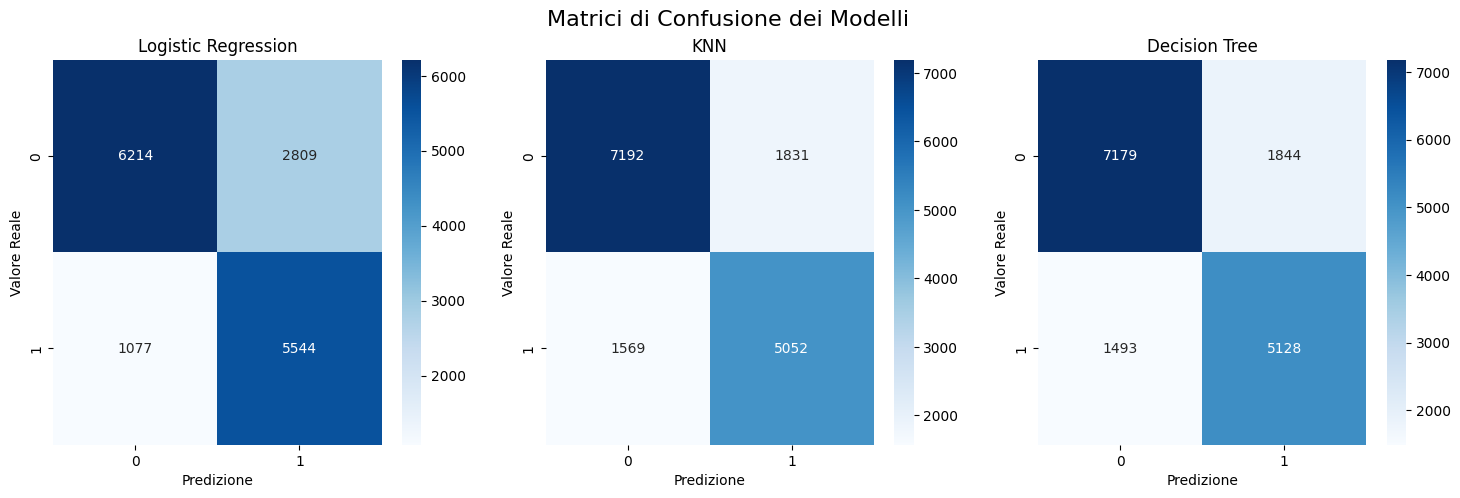

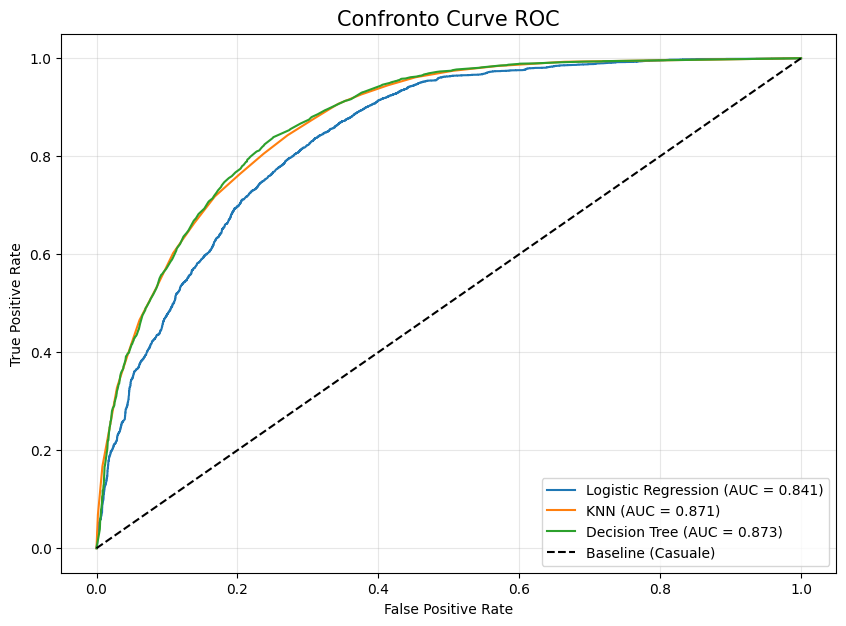


--- Riepilogo Performance ---
                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.751598   0.772475  0.751598  0.752778  0.841130
KNN                  0.782664   0.784120  0.782664  0.783172  0.871459
Decision Tree        0.786691   0.788763  0.786691  0.787330  0.872966


In [212]:
results_summary = {}

# 1. Prepariamo la figura per le Matrici di Confusione (1 riga, 3 colonne)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrici di Confusione dei Modelli', fontsize=16)

# 2. Prepariamo la figura per le Curve ROC
plt.figure(figsize=(10, 7))

for i, (name, model) in enumerate(best_models.items()):
    # Predizioni
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcolo Metriche
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)

    results_summary[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'AUC': auc_score
    }

    # Disegno Matrice di Confusione nel subplot i-esimo
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_ylabel('Valore Reale')
    axes[i].set_xlabel('Predizione')

    # Disegno Curva ROC (tutte nello stesso plot)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

# Finalizzazione Grafico ROC
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (Casuale)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Confronto Curve ROC', fontsize=15)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualizzazione Tabella
df_results = pd.DataFrame(results_summary).T
print("\n--- Riepilogo Performance ---")
print(df_results)

Dall'analisi delle performance sul Test Set, emergono le seguenti considerazioni:

* Il Migliore Modello: Il ***Decision Tree*** ottiene il punteggio più alto con un AUC di $0.873$. Questo suggerisce che l'algoritmo riesce a catturare meglio le relazioni non lineari tra i predittori (ad esempio, come l'effetto dell'età vari significativamente tra diverse specie animali).

* KNN (AUC $0.871$): Si posiziona molto vicino all'albero di decisione. Questo conferma che nel dataset esistono "pattern di similarità" forti: animali con caratteristiche simili tendono ad avere esiti di adozione simili. Tuttavia, KNN è computazionalmente più oneroso in fase di predizione rispetto a un albero.

* Logistic Regression (AUC $0.841$): Pur essendo il modello più semplice, si comporta egregiamente. Rappresenta la nostra baseline robusta. Il distacco di circa 3 punti percentuali di AUC rispetto al Decision Tree giustifica l'utilizzo di modelli più complessi.

**Valutazione della "Bontà" del Modello**  
Un valore di AUC superiore a 0.80 è generalmente considerato buono. Questo significa che se scegliessimo a caso un animale adottato e uno non adottato avremmo l'$87.3%$ di probabilità di assegnare un punteggio di "probabilità di adozione" più alto a quello effettivamente adottato.

Passando dalla Regressione Logistica al Decision Tree, abbiamo ottenuto un incremento di circa $3.5$ punti percentuali in Accuracy e $3.2$ punti in AUC. Questo miglioramento nelle prestazion giustifica l'utilizzo di un algoritmo più complesso.  
Notiamo che per tutti i modelli l'F1-Score è molto vicino all'Accuracy. Questo è un ottimo segno: significa che le classi adottato/non adottaton sono bilanciate o che ***il modello è ugualmente bravo a predire sia i successi che i fallimenti dell'adozione***.